In [1]:
# Tips from RAN

### Data quality
# Mean baseline -> quality cuts on data
# Baseline slope -> best to check if not pileup
# Variance of baseline - > good for amount of noise. 
# Pileup -> trig_loc close to eachother, also check if distributed exponential

### Pulse analysis, spectrum
# Integral, OFL (can mode around) , OF -> energy estimators
# OFL_chi2 (pick corresponding chi2) -> 2D plot
# Peak finding and source calibration -> energy linearity
# Baseline noise into energy, energy threshold -> use calibrated peak amplitude. 
# Energy resolution at calibration energy -> fit calibration peak.

# Optimal Filter catergories
# OFO: No delay
# OF: Time delay allowed in full trace (for me this is likely +/- 4096 samples, but check)
# OFL: Time delay allowed is set by config.OFL_DELAY setting

In [ ]:
# Imports
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
from icecream import ic

import RQ_helper

: 

In [ ]:
# Constants 
results_fn = "/project/def-zqhong/RicochetData/MIT/MIT_Al_December2022/processed/OFResults_Fe55_20230201_4sigma.joblib" #_20230111
output_dir = "/project/def-zqhong/RicochetData/MIT/MIT_Al_December2022/output/"
series = "Fe55"

: 

In [4]:
# Load reduced quantities
RQ_data = joblib.load(results_fn)
exec(RQ_data["config_str"])
#Prepare RQ_helper
rq_helper = RQ_helper.RQ_helper(RQ_data, config, series, output_dir)
#list(RQ_data.keys())

RQ helper is initialised


In [5]:
# Define Masks
mask_noise = (RQ_data['trig_amp']<1)
mask_trigger = (RQ_data['trig_amp']>2)

mask_tes = mask_trigger & (RQ_data['Amplitude_CH1']/RQ_data['Integral_CH1']>0.003) & (RQ_data['Amplitude_CH1']>0.02)
mask_crystal = mask_trigger & (~mask_tes)

print('Original triggered events:', sum(RQ_data['trig_ch']))
print('After quality cuts:', sum(mask_trigger))
print('TES-like pulses:', sum(mask_tes))
print('Crystal-like pulses', sum(mask_crystal))

Original triggered events: 39862
After quality cuts: 21613
TES-like pulses: 386
Crystal-like pulses 21227


In [6]:
print("The auto threshold was tes to", RQ_data['trig_config']['CH1']['trigger_threshold_auto'], "which was calculated to be", RQ_data['trig_config']['CH1']['trigger_threshold'])

The auto threshold was tes to None which was calculated to be 1.1234407973959069


### Explore 1D Data with histograms

Noise:  OF0_CH1                       #items: (19600,) , mean: 1.43e-05  , std: 0.00118   
Trigger:OF0_CH1                       #items: (39862,) , mean: 0.00431   , std: 0.00767   


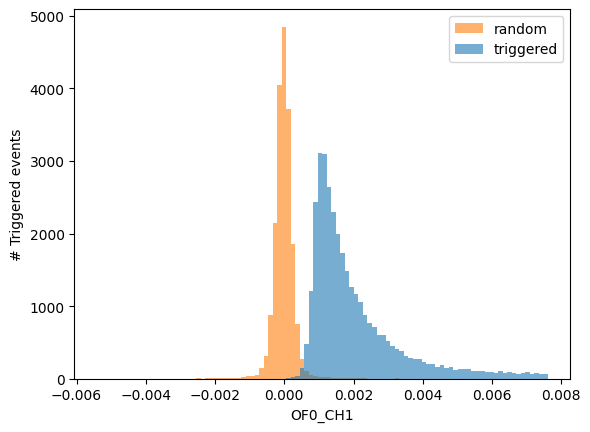

Noise:  OF0_chi2_CH1                  #items: (19600,) , mean: 1.11      , std: 5.38      
Trigger:OF0_chi2_CH1                  #items: (39862,) , mean: 2.14      , std: 10.6      


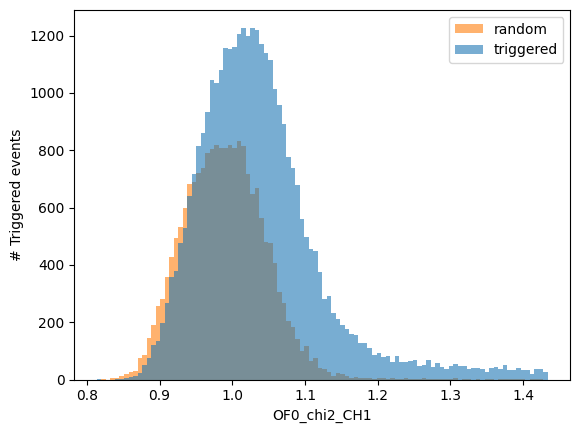

Noise:  OF0_chi2time_CH1              #items: (19600,) , mean: 1.23      , std: 13.9      
Trigger:OF0_chi2time_CH1              #items: (39862,) , mean: 2.84      , std: 19.2      


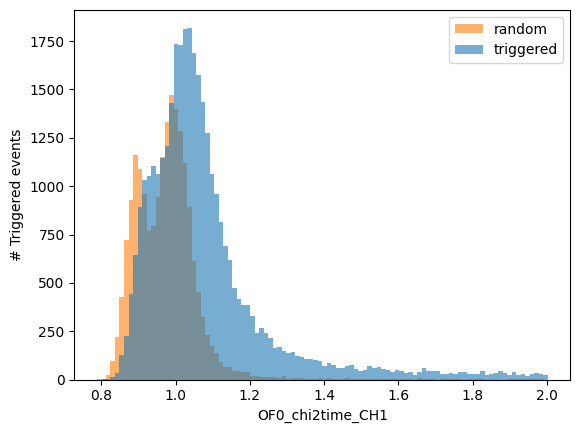

Noise:  OF0_chi2timeFiltered_CH1      #items: (19600,) , mean: 0.58      , std: 13.9      
Trigger:OF0_chi2timeFiltered_CH1      #items: (39862,) , mean: 2.17      , std: 19.1      


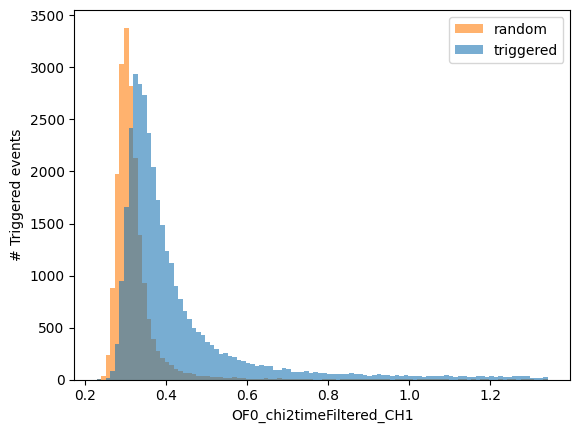

Noise:  OF0_chi2timeShort_CH1         #items: (19600,) , mean: 0.37      , std: 9.31      
Trigger:OF0_chi2timeShort_CH1         #items: (39862,) , mean: 2.56      , std: 33.7      


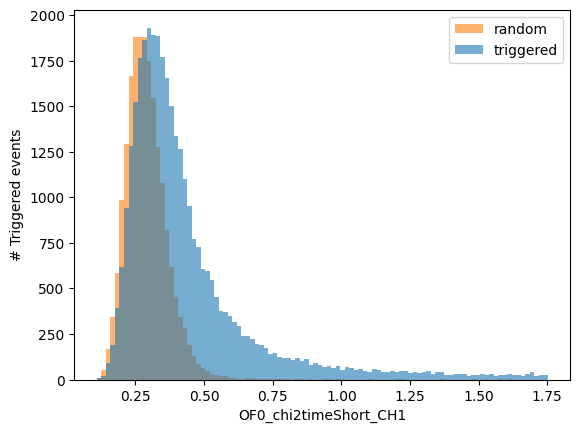

Noise:  OF_CH1                        #items: (19600,) , mean: 0.000379  , std: 0.00325   
Trigger:OF_CH1                        #items: (39862,) , mean: 0.00533   , std: 0.0101    


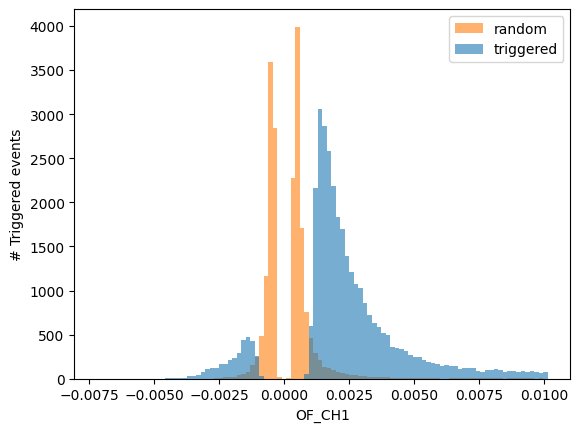

Noise:  OF_chi2_CH1                   #items: (19600,) , mean: 1.03      , std: 2.07      
Trigger:OF_chi2_CH1                   #items: (39862,) , mean: 1.71      , std: 7.9       


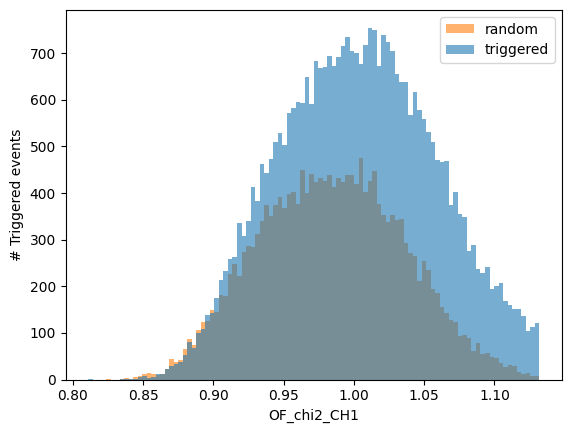

Noise:  OF_chi2time_CH1               #items: (19600,) , mean: 1.04      , std: 3.95      
Trigger:OF_chi2time_CH1               #items: (39862,) , mean: 2.05      , std: 14.2      


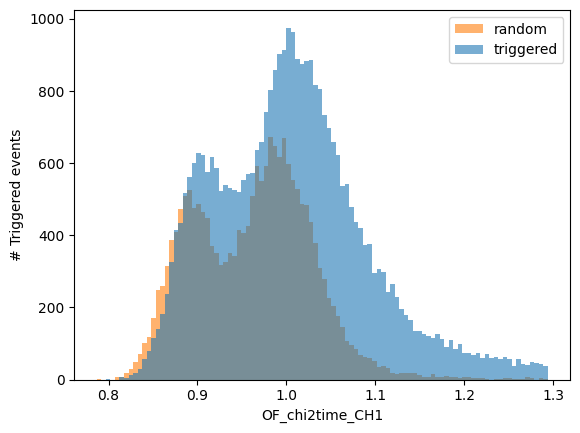

Noise:  OF_time_CH1                   #items: (19600,) , mean: 0.00227   , std: 0.0288    
Trigger:OF_time_CH1                   #items: (39862,) , mean: 0.00277   , std: 0.0103    


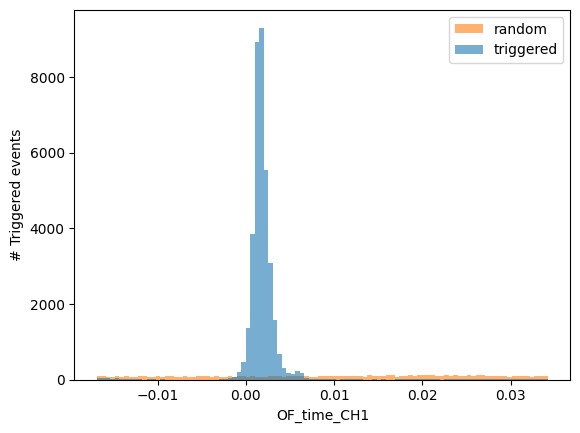

Noise:  OFL_CH1                       #items: (19600,) , mean: 6.57e-05  , std: 0.00265   
Trigger:OFL_CH1                       #items: (39862,) , mean: 0.00556   , std: 0.00994   


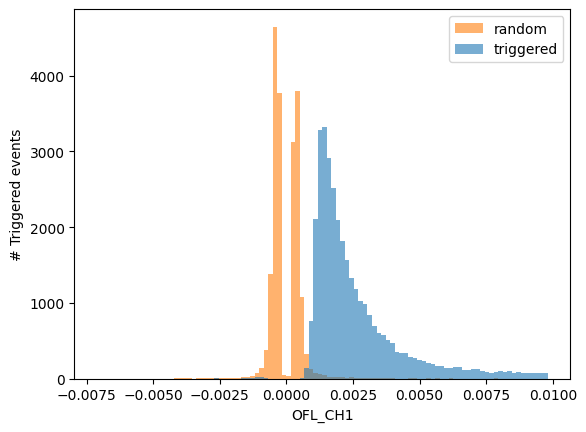

Noise:  OFL_chi2_CH1                  #items: (19600,) , mean: 1.06      , std: 2.51      
Trigger:OFL_chi2_CH1                  #items: (39862,) , mean: 1.72      , std: 7.91      


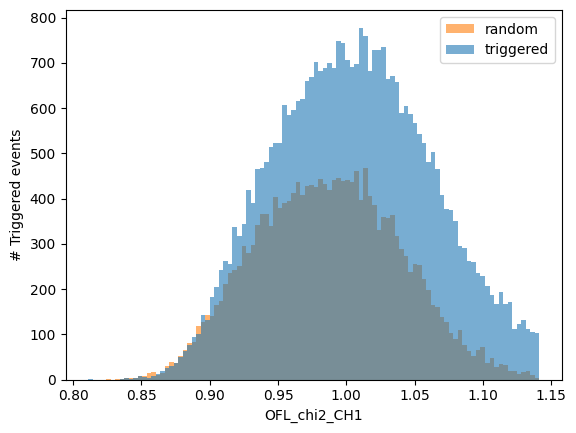

Noise:  OFL_chi2a_CH1                 #items: (19600,) , mean: 1.08      , std: 3.63      
Trigger:OFL_chi2a_CH1                 #items: (39862,) , mean: 2.12      , std: 12.6      


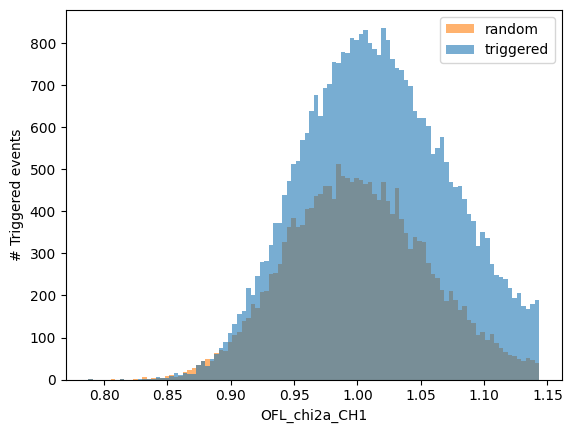

Noise:  OFL_chi2b_CH1                 #items: (19600,) , mean: 0.212     , std: 0.501     
Trigger:OFL_chi2b_CH1                 #items: (39862,) , mean: 0.343     , std: 1.58      


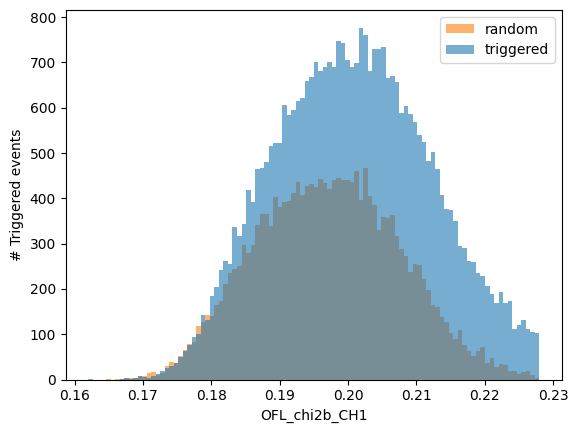

Noise:  OFL_chi2time_CH1              #items: (19600,) , mean: 1.11      , std: 4.99      
Trigger:OFL_chi2time_CH1              #items: (39862,) , mean: 2.06      , std: 14.2      


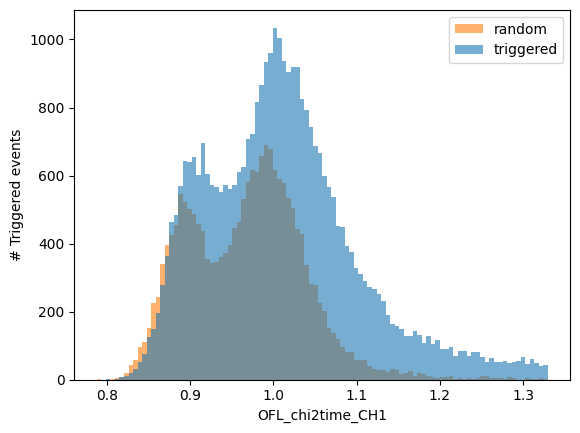

Noise:  OFL_time_CH1                  #items: (19600,) , mean: 0.000788  , std: 0.00627   
Trigger:OFL_time_CH1                  #items: (39862,) , mean: 0.00184   , std: 0.00149   


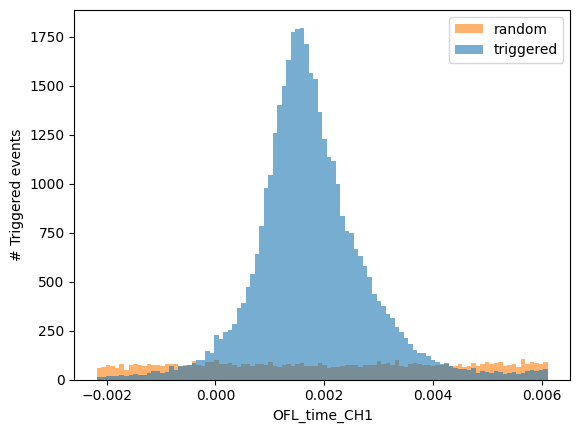

Noise:  OFL_chi2timeFiltered_CH1      #items: (19600,) , mean: 0.457     , std: 4.97      
Trigger:OFL_chi2timeFiltered_CH1      #items: (39862,) , mean: 1.39      , std: 14.1      


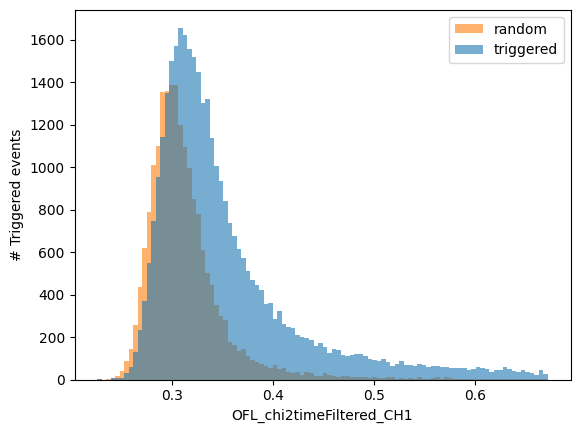

Noise:  OFL_chi2timeShort_CH1         #items: (19600,) , mean: 0.352     , std: 8.91      
Trigger:OFL_chi2timeShort_CH1         #items: (39862,) , mean: 0.918     , std: 8         


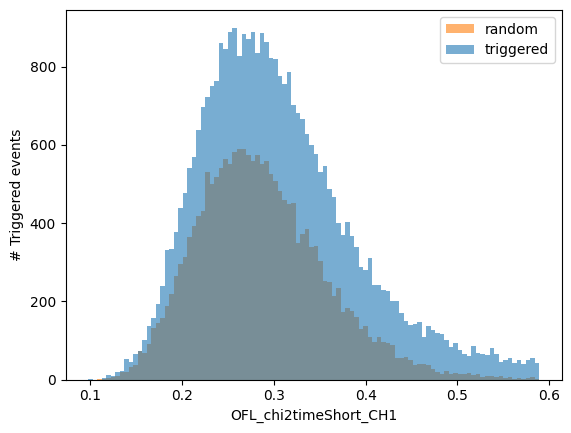

Noise:  OFP1_CH1                      #items: (19600,) , mean: -6.08e-05 , std: 0.00991   
Trigger:OFP1_CH1                      #items: (39862,) , mean: -0.0149   , std: 0.0508    


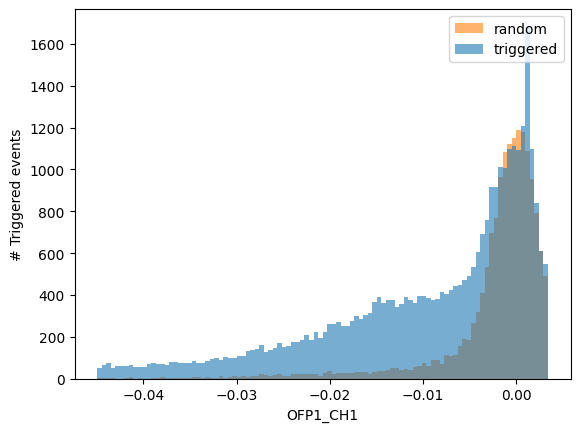

Noise:  OFP2_CH1                      #items: (19600,) , mean: 7.92e-05  , std: 0.0101    
Trigger:OFP2_CH1                      #items: (39862,) , mean: 0.0196    , std: 0.0562    


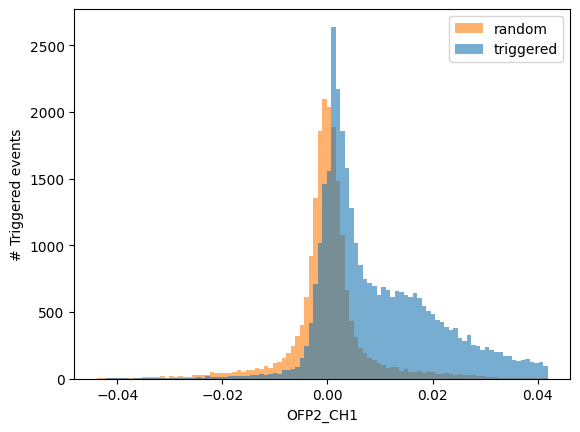

Noise:  OFP1_time_CH1                 #items: (19600,) , mean: -1.95e-06 , std: 4.09e-05  
Trigger:OFP1_time_CH1                 #items: (39862,) , mean: 0.000269  , std: 0.000291  


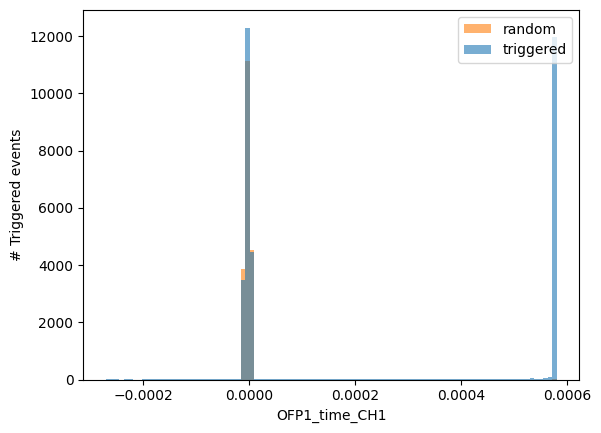

Noise:  OFP2_time_CH1                 #items: (19600,) , mean: 1.78e-06  , std: 3.85e-05  
Trigger:OFP2_time_CH1                 #items: (39862,) , mean: 0.000294  , std: 0.000293  


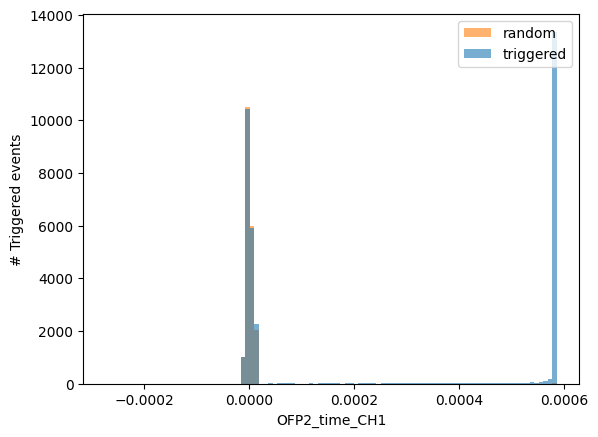

Noise:  OFP_chi2_CH1                  #items: (19600,) , mean: 0.255     , std: 0.528     
Trigger:OFP_chi2_CH1                  #items: (39862,) , mean: 0.344     , std: 0.969     


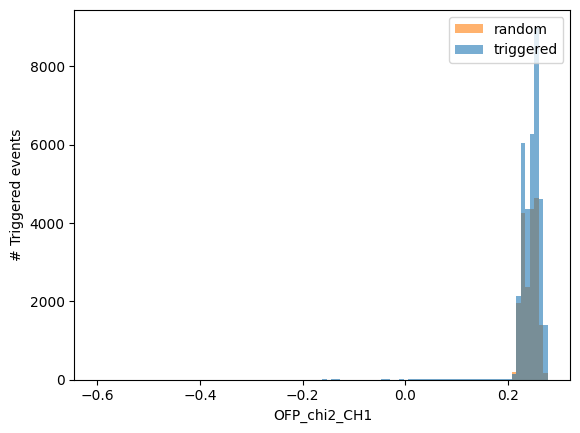

Noise:  OFP_chi2timeFiltered_CH1      #items: (19600,) , mean: 0.573     , std: 13.5      
Trigger:OFP_chi2timeFiltered_CH1      #items: (39862,) , mean: 1.86      , std: 16.1      


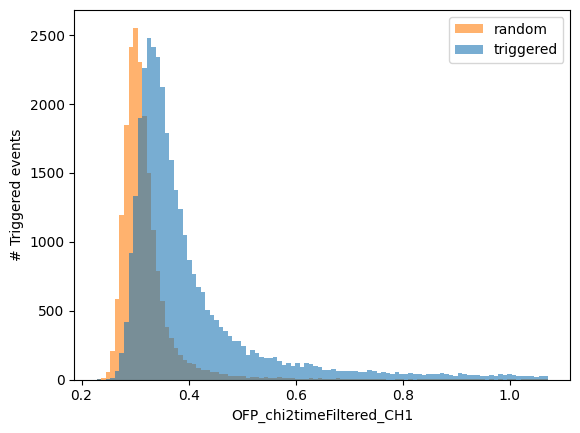

Noise:  OFP_chi2timeShort_CH1         #items: (19600,) , mean: 0.372     , std: 9.05      
Trigger:OFP_chi2timeShort_CH1         #items: (39862,) , mean: 2.67      , std: 23.5      


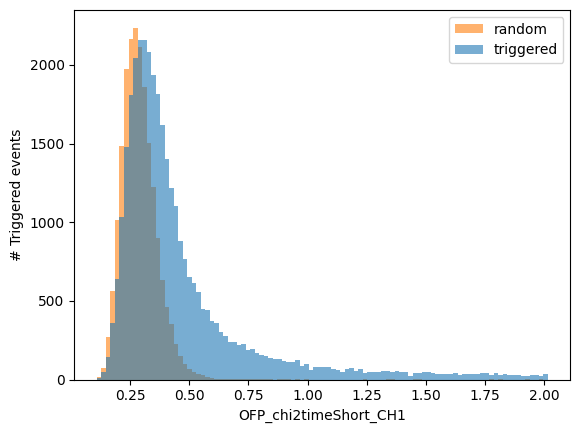

Noise:  MeanBase_CH1                  #items: (19600,) , mean: -0.319    , std: 0.0161    
Trigger:MeanBase_CH1                  #items: (39862,) , mean: -0.319    , std: 0.0163    


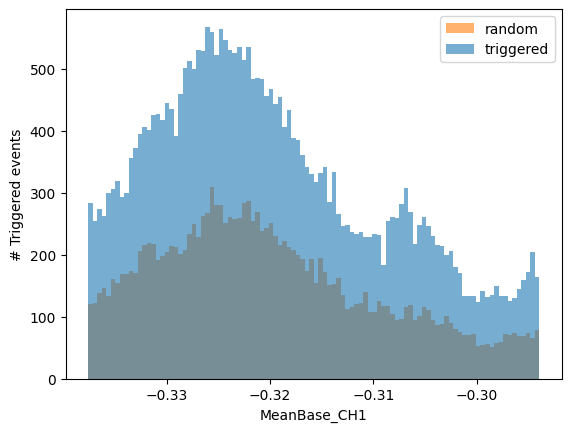

Noise:  MF_CH1                        #items: (19600,) , mean: nan       , std: nan       
Trigger:MF_CH1                        #items: (39862,) , mean: nan       , std: nan       


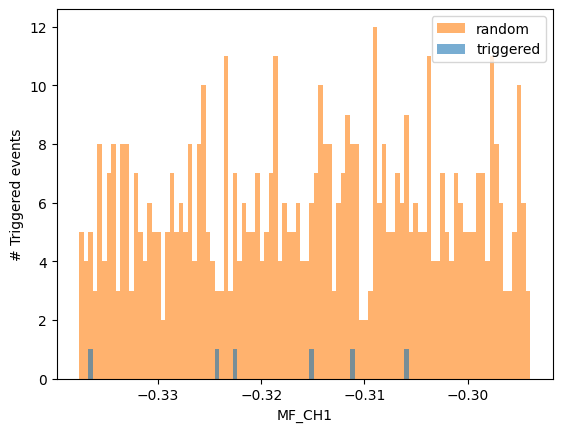

Noise:  Amplitude_CH1                 #items: (19600,) , mean: 0.00398   , std: 0.00761   
Trigger:Amplitude_CH1                 #items: (39862,) , mean: 0.0107    , std: 0.0311    


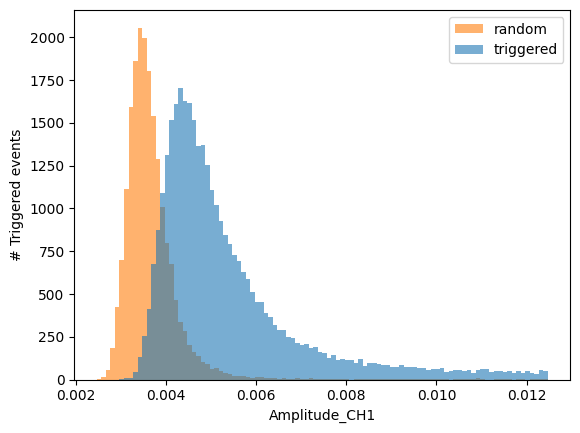

Noise:  Max_CH1                       #items: (19600,) , mean: -0.315    , std: 0.0179    
Trigger:Max_CH1                       #items: (39862,) , mean: -0.308    , std: 0.0348    


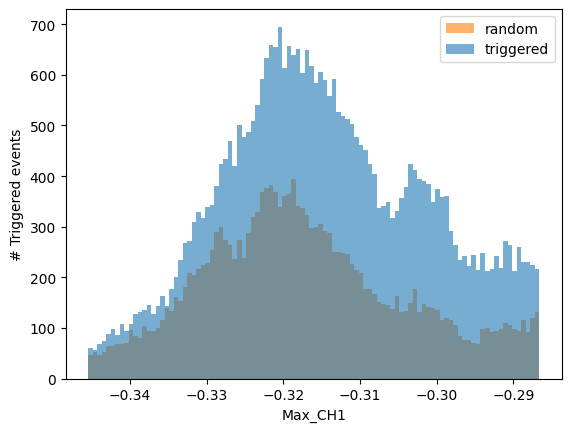

Noise:  MaxHead_CH1                   #items: (19600,) , mean: -0.316    , std: 0.0167    
Trigger:MaxHead_CH1                   #items: (39862,) , mean: -0.315    , std: 0.0168    


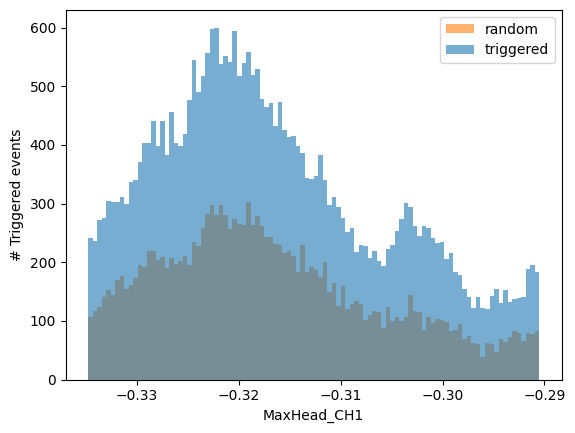

Noise:  MaxTail_CH1                   #items: (19600,) , mean: -0.315    , std: 0.0171    
Trigger:MaxTail_CH1                   #items: (39862,) , mean: -0.308    , std: 0.0346    


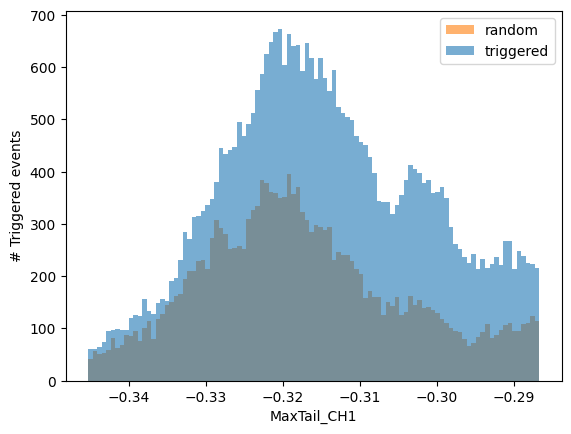

Noise:  MaxSlope_CH1                  #items: (19600,) , mean: 0.000459  , std: 0.000436  
Trigger:MaxSlope_CH1                  #items: (39862,) , mean: 0.000767  , std: 0.00312   


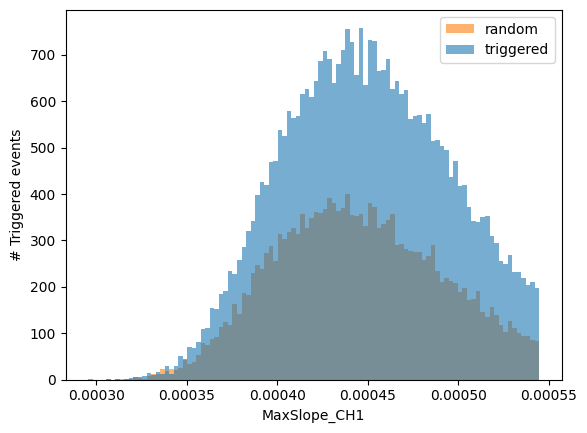

Noise:  Integral_CH1                  #items: (19600,) , mean: 0.0542    , std: 6.53      
Trigger:Integral_CH1                  #items: (39862,) , mean: 11.1      , std: 20.1      


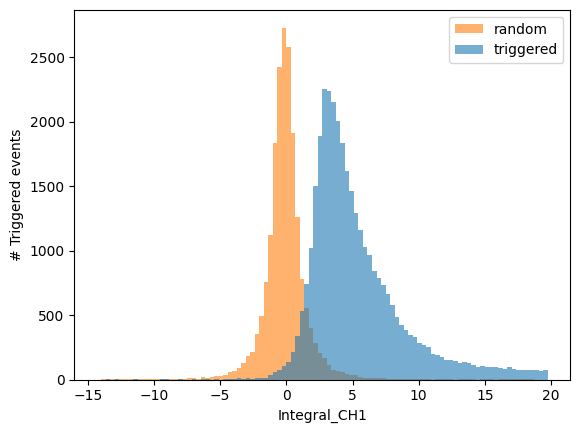

Noise:  Integral2_CH1                 #items: (19600,) , mean: 0.136     , std: 5.25      
Trigger:Integral2_CH1                 #items: (39862,) , mean: 2.67      , std: 14.9      


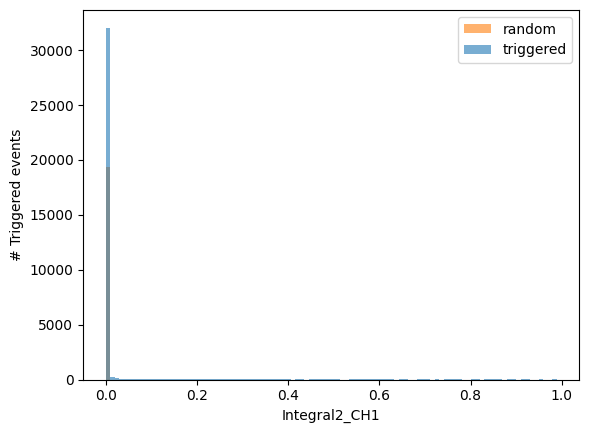

Noise:  IntegralHead_CH1              #items: (19600,) , mean: 6.97e-08  , std: 5.66e-05  
Trigger:IntegralHead_CH1              #items: (39862,) , mean: 5.34e-08  , std: 5.61e-05  


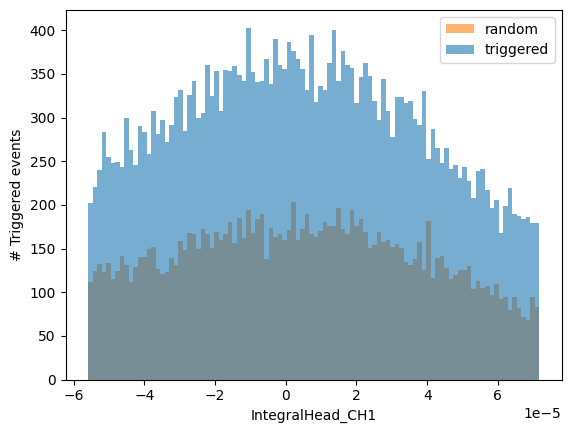

Noise:  IntegralTail_CH1              #items: (19600,) , mean: 0.044     , std: 5.05      
Trigger:IntegralTail_CH1              #items: (39862,) , mean: 11        , std: 19.6      


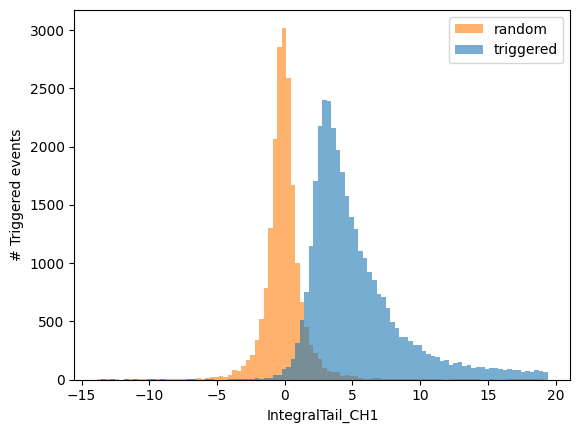

Noise:  BaselineSlope_CH1             #items: (19600,) , mean: -1.95e-10 , std: 3.73e-07  
Trigger:BaselineSlope_CH1             #items: (39862,) , mean: -1.8e-08  , std: 2.34e-07  


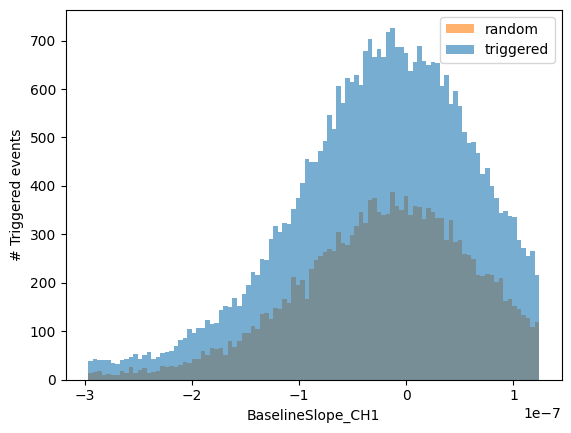

Noise:  Slope_CH1                     #items: (19600,) , mean: -2.8e-09  , std: 4.16e-07  
Trigger:Slope_CH1                     #items: (39862,) , mean: -6.63e-07 , std: 1.22e-06  


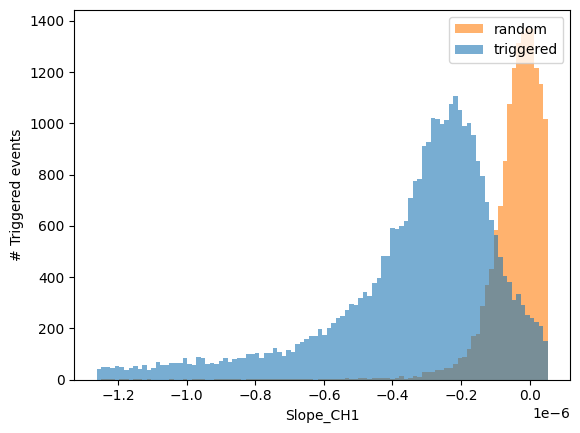

Noise:  PlateauAmplitude_CH1          #items: (19600,) , mean: -0.319    , std: 0.0162    
Trigger:PlateauAmplitude_CH1          #items: (39862,) , mean: -0.318    , std: 0.0163    


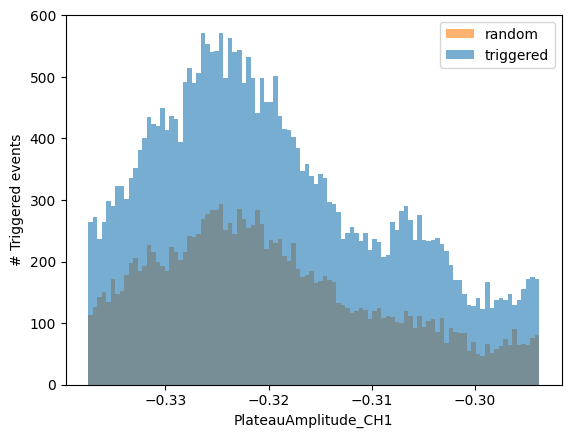

Noise:  RiseTime1_CH1                 #items: (19600,) , mean: 2.07      , std: 30        
Trigger:RiseTime1_CH1                 #items: (39862,) , mean: 1.71      , std: 7.43      


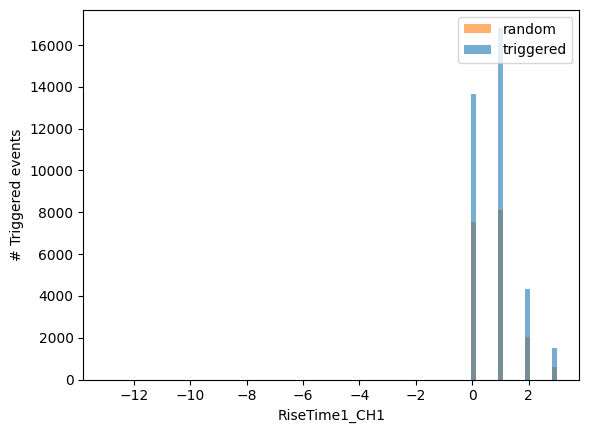

Noise:  RiseTime2_CH1                 #items: (19600,) , mean: 3.53      , std: 36.9      
Trigger:RiseTime2_CH1                 #items: (39862,) , mean: 2.74      , std: 10.1      


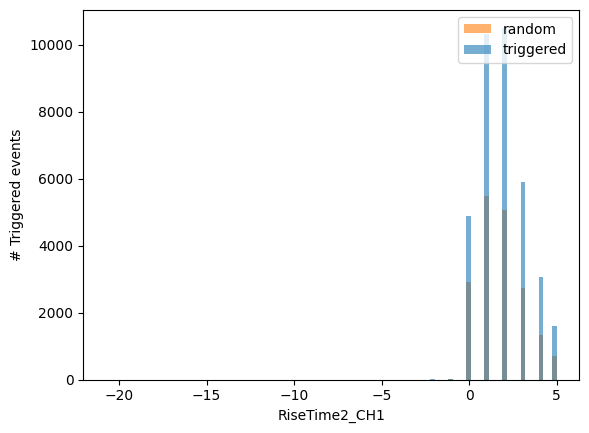

Noise:  RiseTime3_CH1                 #items: (19600,) , mean: 0.83      , std: 9.85      
Trigger:RiseTime3_CH1                 #items: (39862,) , mean: 0.759     , std: 2.45      


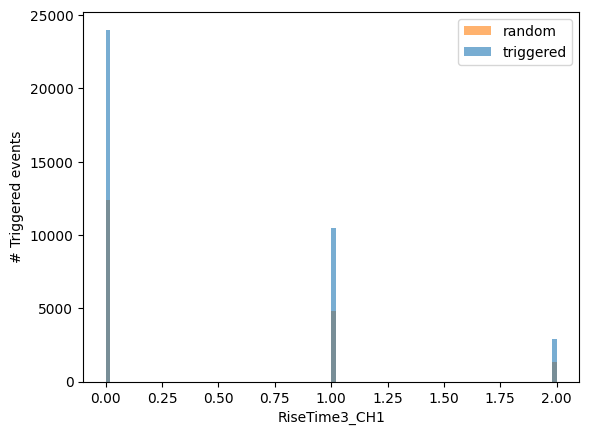

Noise:  FallTime1_CH1                 #items: (19600,) , mean: 3.28      , std: 46.3      
Trigger:FallTime1_CH1                 #items: (39862,) , mean: 5.06      , std: 95.6      


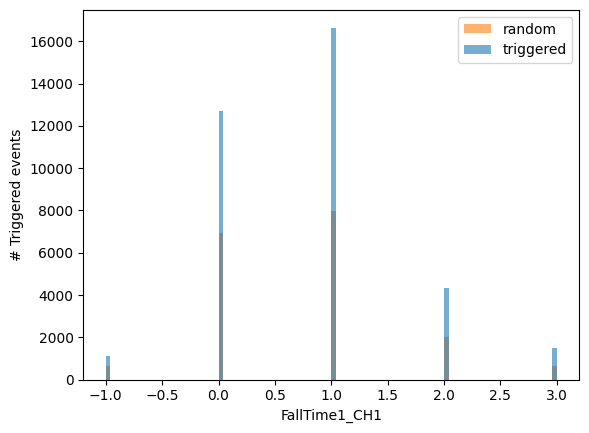

Noise:  FallTime2_CH1                 #items: (19600,) , mean: 3.86      , std: 46.3      
Trigger:FallTime2_CH1                 #items: (39862,) , mean: 7.18      , std: 119       


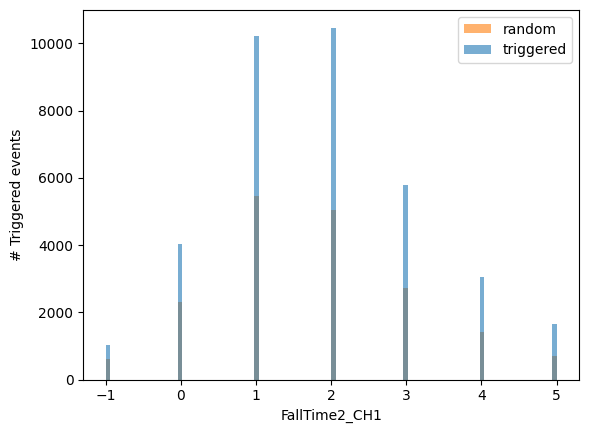

Noise:  FallTime3_CH1                 #items: (19600,) , mean: 1.75      , std: 9.8       
Trigger:FallTime3_CH1                 #items: (39862,) , mean: 4.11      , std: 90.7      


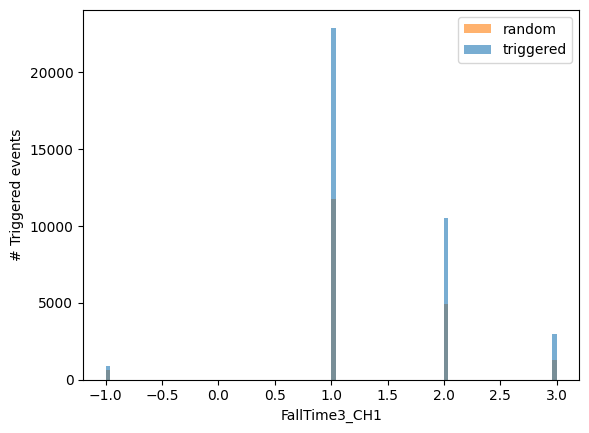

Noise:  PulseWidth50_CH1              #items: (19600,) , mean: 9.99      , std: 77.7      
Trigger:PulseWidth50_CH1              #items: (39862,) , mean: 12.8      , std: 128       


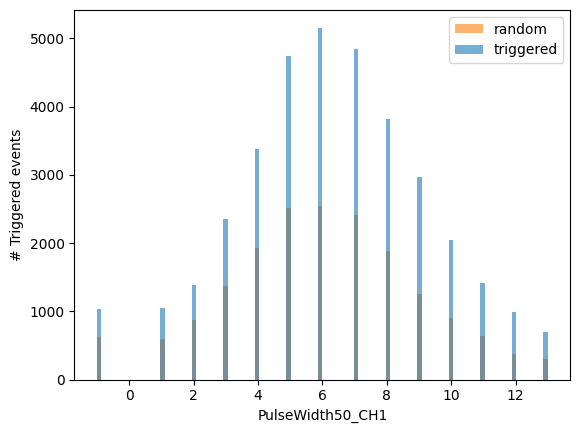

Noise:  PulseMaxInd_CH1               #items: (19600,) , mean: 14.5      , std: 9.41      
Trigger:PulseMaxInd_CH1               #items: (39862,) , mean: 14.7      , std: 9.52      


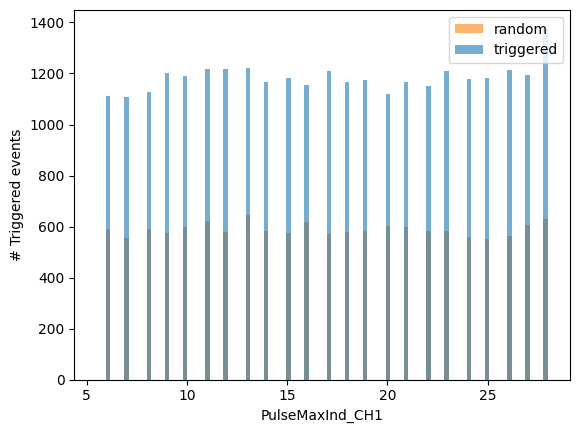

OFResolution_CH1 [0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527 0.00019527
 0.00019527]
Noise:  BaselineVariance_CH1          #items: (19600,) , mean: 3.52e-06  , std: 2.45e-05  
Trigger:BaselineVariance_CH1          #items: (39862,) , mean: 3.23e-06  , std: 7.94e-06  


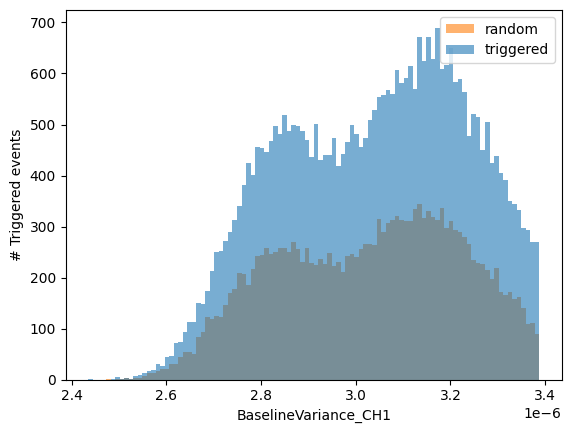

Noise:  TailVariance_CH1              #items: (19600,) , mean: 3.61e-06  , std: 2.11e-05  
Trigger:TailVariance_CH1              #items: (39862,) , mean: 1.32e-05  , std: 8.59e-05  


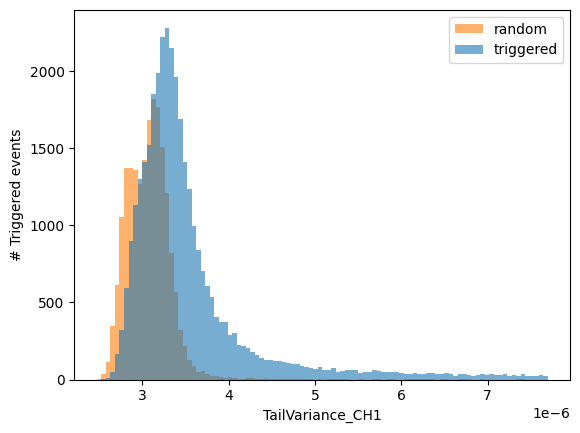

Noise:  Max-Min_CH1                   #items: (19600,) , mean: 0.0159    , std: 0.00833   
Trigger:Max-Min_CH1                   #items: (39862,) , mean: 0.0218    , std: 0.031     


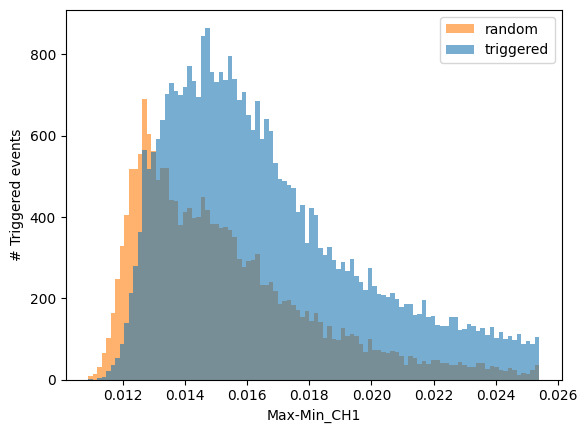

Noise:  Average_CH1                   #items: (19600,) , mean: -0.319    , std: 0.0161    
Trigger:Average_CH1                   #items: (39862,) , mean: -0.317    , std: 0.0164    


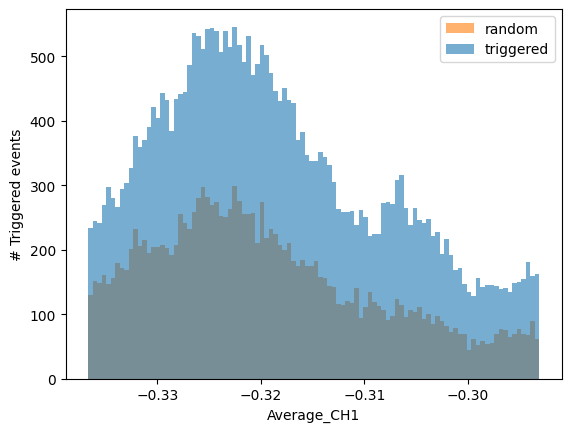

Noise:  Whole_Trace_Slope_CH1         #items: (19600,) , mean: 1.65e-09  , std: 2.21e-07  
Trigger:Whole_Trace_Slope_CH1         #items: (39862,) , mean: 4.15e-07  , std: 7.58e-07  


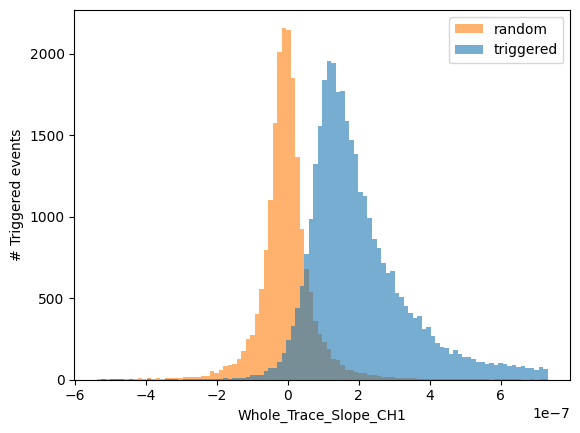

Noise:  Skewness_CH1                  #items: (19600,) , mean: 0.0209    , std: 0.382     
Trigger:Skewness_CH1                  #items: (39862,) , mean: 0.293     , std: 1.36      


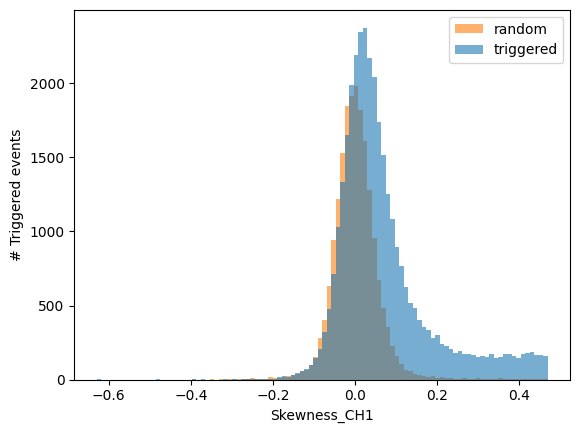

Noise:  Integral3_CH1                 #items: (19600,) , mean: 0.13      , std: 5.45      
Trigger:Integral3_CH1                 #items: (39862,) , mean: 7.38      , std: 15.6      


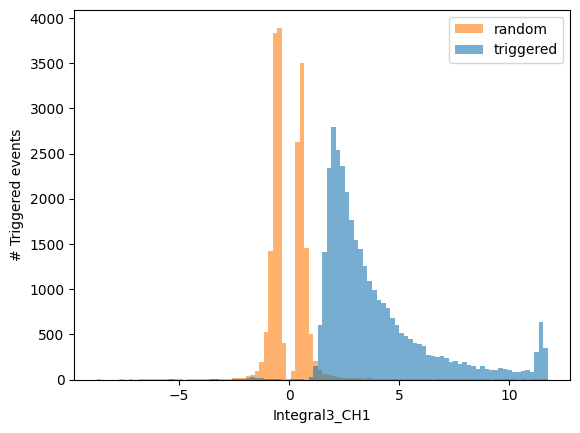

Noise:  trig_fileidx                  #items: (19600,) , mean: 4.59      , std: 2.83      
Trigger:trig_fileidx                  #items: (39862,) , mean: 4.53      , std: 2.86      


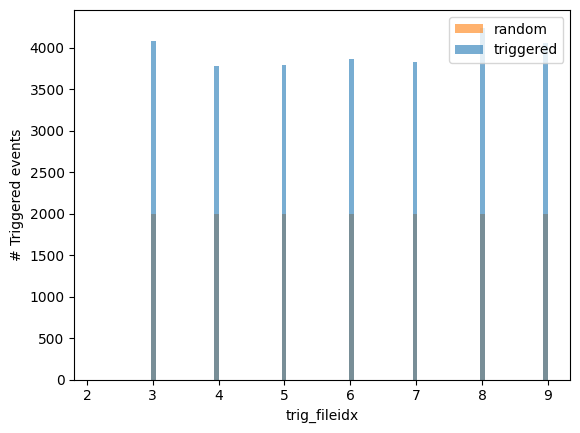

Noise:  trig_ch                       #items: (19600,) , mean: 0         , std: 0         
Trigger:trig_ch                       #items: (39862,) , mean: 1         , std: 0         


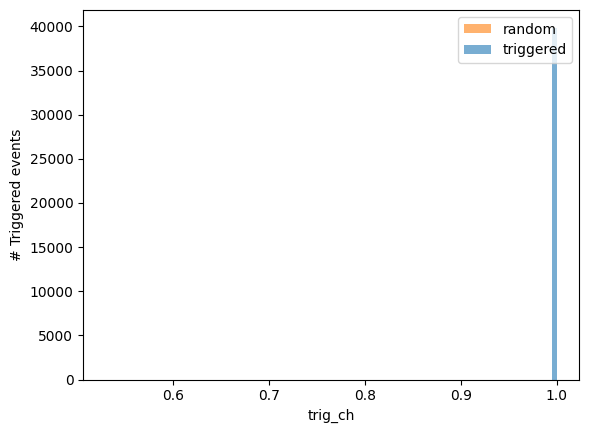

Noise:  trig_traceidx                 #items: (19600,) , mean: 50.3      , std: 28.6      
Trigger:trig_traceidx                 #items: (39862,) , mean: 49.1      , std: 29        


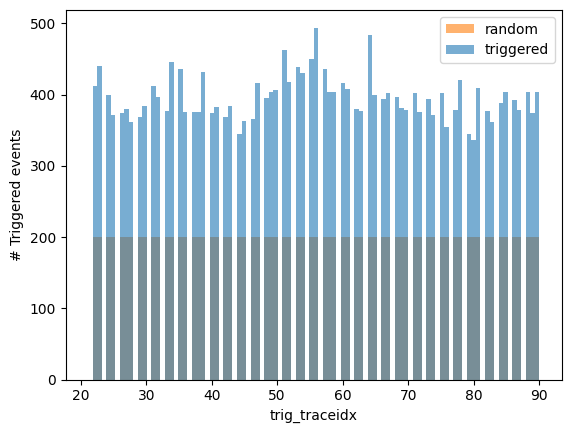

Noise:  trig_traceblockidx            #items: (19600,) , mean: 9.5       , std: 5.77      
Trigger:trig_traceblockidx            #items: (39862,) , mean: 9.48      , std: 5.74      


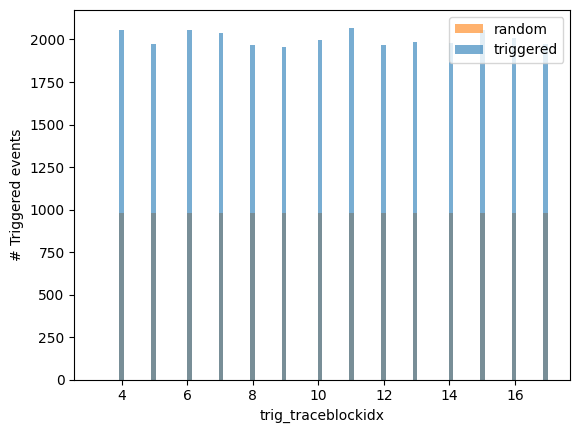

Noise:  trig_loc                      #items: (19600,) , mean: 2.87e+06  , std: 1.66e+06  
Trigger:trig_loc                      #items: (39862,) , mean: 2.99e+06  , std: 1.73e+06  


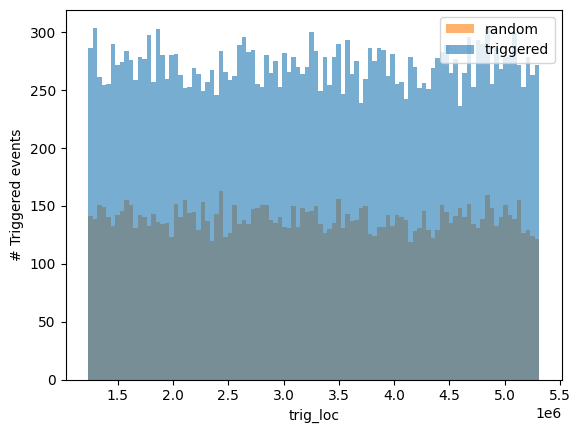

Noise:  trig_amp                      #items: (19600,) , mean: 0         , std: 0         
Trigger:trig_amp                      #items: (39862,) , mean: 5.19      , std: 9.1       


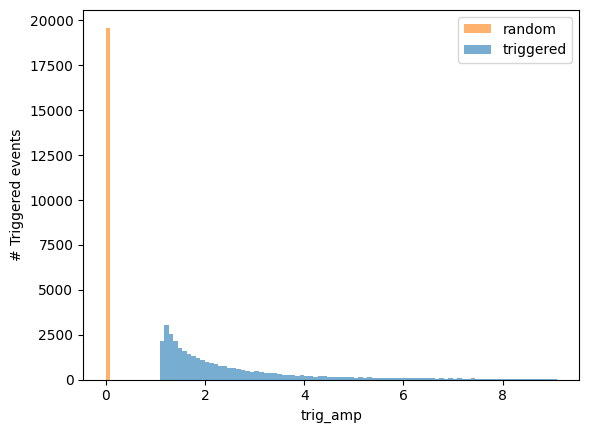

Noise:  trig_width                    #items: (19600,) , mean: 0         , std: 0         
Trigger:trig_width                    #items: (39862,) , mean: 1.63e+03  , std: 784       


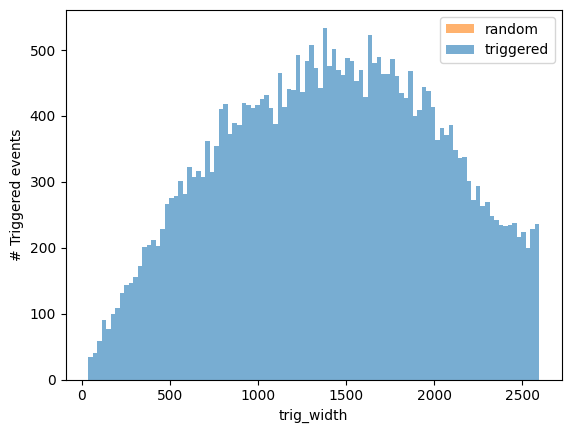

Noise:  trig_pileups                  #items: (19600,) , mean: 0         , std: 0         
Trigger:trig_pileups                  #items: (39862,) , mean: 0         , std: 0         


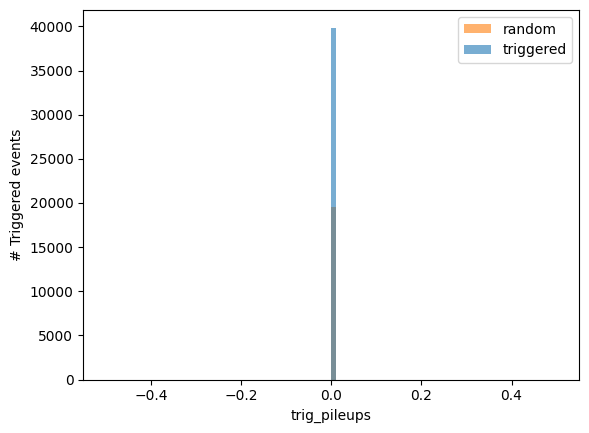

Noise:  trig_amp_CH1                  #items: (19600,) , mean: -0.319    , std: 0.0163    
Trigger:trig_amp_CH1                  #items: (39862,) , mean: -0.318    , std: 0.0164    


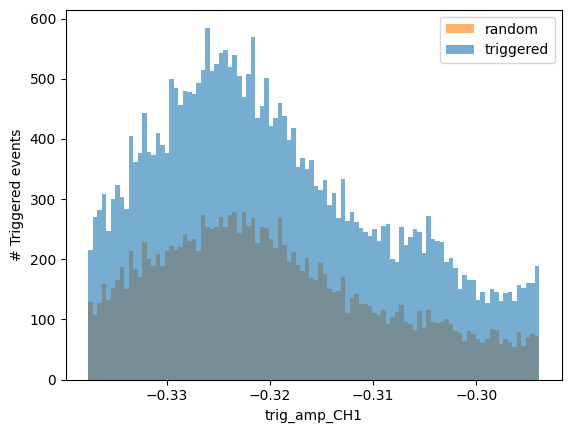

SeriesNumber ['Fe55' 'Fe55' 'Fe55' ... 'Fe55' 'Fe55' 'Fe55']
Noise:  timestamp                     #items: (19600,) , mean: 1.97e+09  , std: 1.71e+08  
Trigger:timestamp                     #items: (39862,) , mean: 1.97e+09  , std: 1.74e+08  


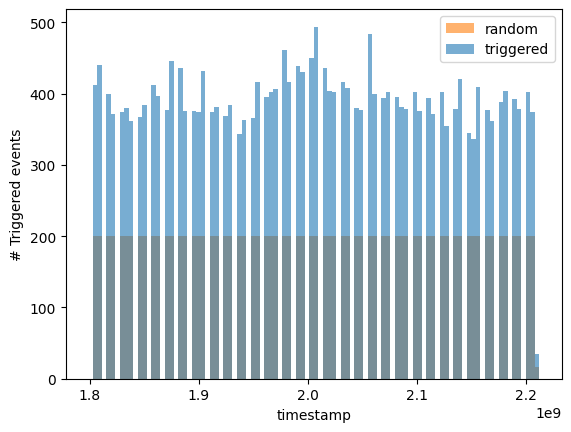

sample_rate []
start_time []
trig_ch_list [['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']
 ['Random' 'CH1']]
config_str import pycrp.processing.configs.config_template 
# incase the fi

In [7]:
trig_mask = RQ_data['trig_ch']

for k,v in RQ_data.items(): 
    if type(v)==str or type(v)==dict or len(v)!=len(trig_mask):
        print(k,v)
    elif np.issubdtype(v.dtype, np.number):        
        # Make a histogram
        triggered = v[trig_mask==1]
        random = v[trig_mask==0]
        print("Noise:  {:<30}#items:".format(k), random.shape,", mean: {:<10.3g}, std: {:<10.3g}".format(np.mean(random),np.std(random)))
        print("Trigger:{:<30}#items:".format(k), triggered.shape,", mean: {:<10.3g}, std: {:<10.3g}".format(np.mean(triggered),np.std(triggered)))
        range_min = max(min(v), np.median(v)-np.std(v))
        range_max = np.percentile(v, 90)
        if all(np.isfinite((range_min,range_max))):
            ranges = (range_min,range_max)
        else:
            renges=None
            
        plt.hist([triggered,random], range=ranges, bins=100, 
                 stacked=False, label=['triggered', 'random'],
                 histtype="stepfilled", alpha=0.6)
        plt.xlabel(k)
        plt.ylabel("# Triggered events")
        plt.legend()
        plt.show()
    else:
        print("error")
        

### Explore 2D data 

In [8]:
# Define 2D configs
config_2d_scatter = {"type":"scatter"}
config_2d_hist = {"type":"hist"}

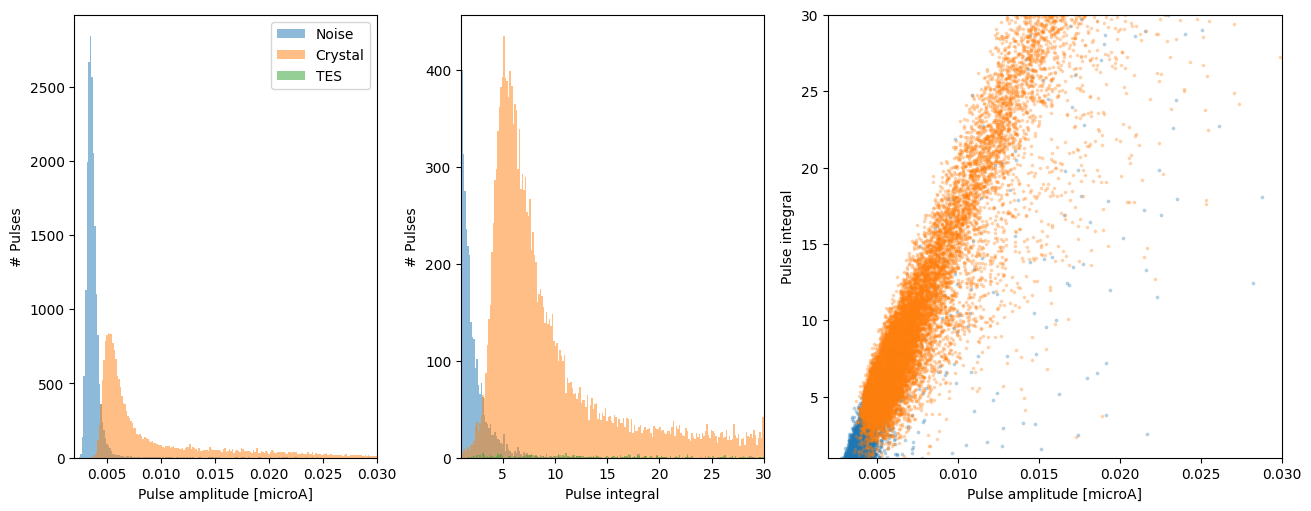

In [9]:
# Zoom out
var1 = {'name': 'Amplitude_CH1',
        'label': 'Pulse amplitude [microA]',
        'range': (0.002,0.03),
        'bins': 200,
        'norm':False
       }

var2 = {'name': 'Integral_CH1',
        'label': 'Pulse integral',
        'range': (1,30),
        'bins': 200,
        'norm':False
       }
mask_arr = [mask_noise, mask_crystal, mask_tes] 
mask_labs = ['Noise', 'Crystal', 'TES']
_ = rq_helper.plot_pairs(var1,var2,mask_arr,mask_labs, config_2d_scatter)

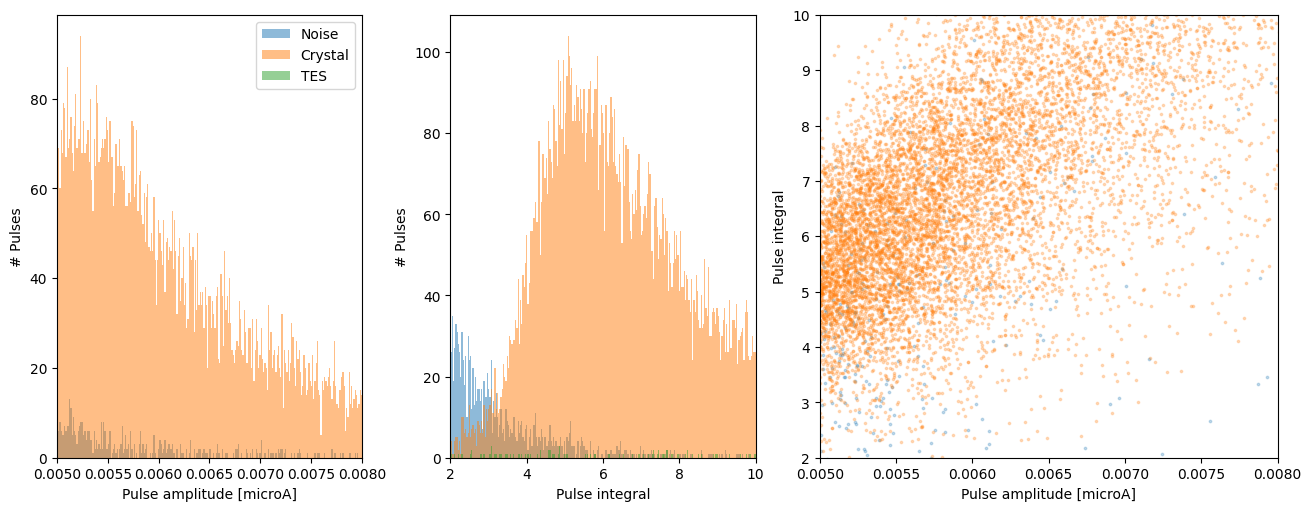

In [10]:
# Zoom in
var1 = {'name': 'Amplitude_CH1',
        'label': 'Pulse amplitude [microA]',
        'range': (0.005,0.008),
        'bins': 250,
        'norm':False
       }

var2 = {'name': 'Integral_CH1',
        'label': 'Pulse integral',
        'range': (2,10),
        'bins': 250,
        'norm':False
       }
mask_arr = [mask_noise, mask_crystal, mask_tes] 
mask_labs = ['Noise', 'Crystal', 'TES']
_ = rq_helper.plot_pairs(var1,var2,mask_arr,mask_labs, config_2d_scatter)

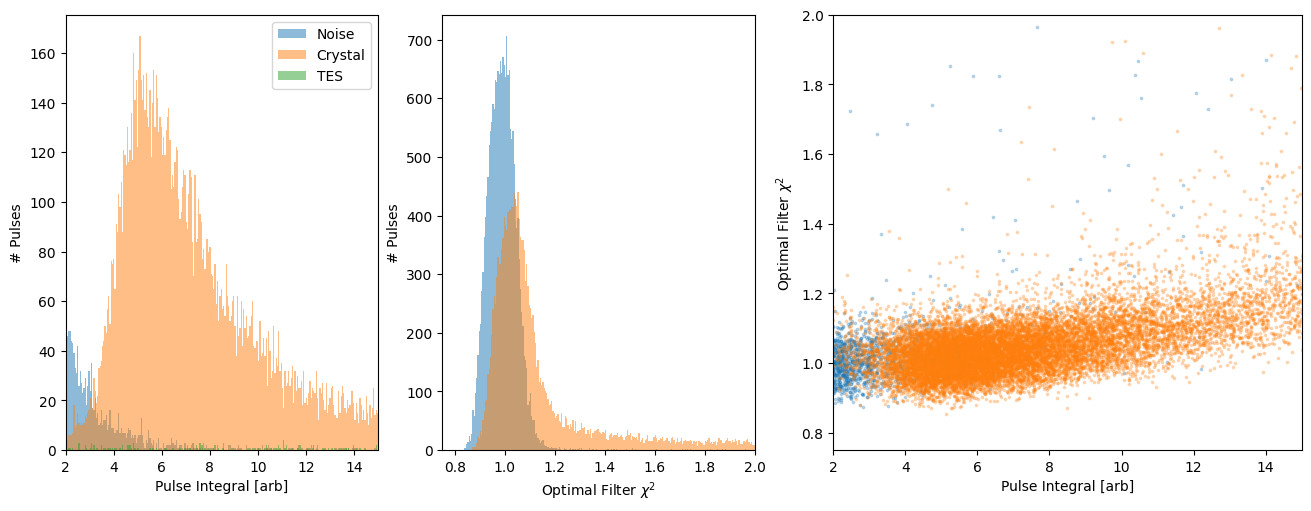

In [11]:
# Chi2
var1 = {'name': 'Integral_CH1',
        'label': 'Pulse Integral [arb]',
        'range': (2,15),
        'bins': 250,
        'norm':False
       }

var2 = {'name': 'OF0_chi2_CH1',
        'label': r'Optimal Filter $\chi^2$',
        'range': (0.75,2),
        'bins': 250,
        'norm':False
       }
mask_arr = [mask_noise, mask_crystal, mask_tes] 
mask_labs = ['Noise', 'Crystal', 'TES']
_ = rq_helper.plot_pairs(var1,var2,mask_arr,mask_labs, config_2d_scatter)

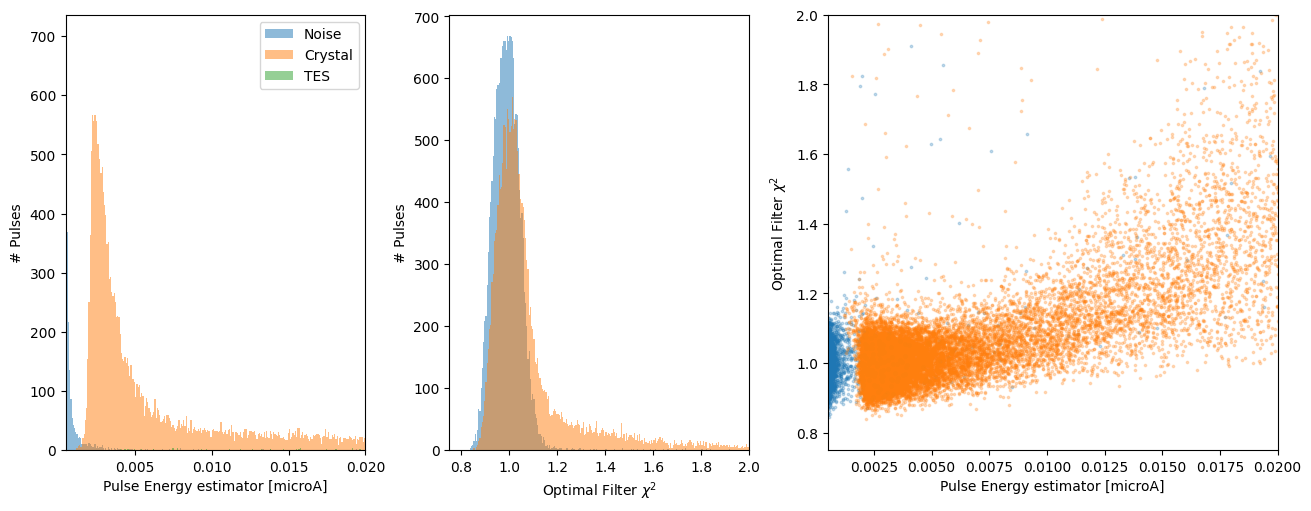

In [12]:
# Chi2
var1 = {'name': 'OFL_CH1',
        'label': 'Pulse Energy estimator [microA]',
        'range': (0.0005,0.02),
        'bins': 250,
        'norm':False
       }

var2 = {'name': 'OFL_chi2_CH1',
        'label': r'Optimal Filter $\chi^2$',
        'range': (0.75,2),
        'bins': 250,
        'norm':False
       }
mask_arr = [mask_noise, mask_crystal, mask_tes] 
mask_labs = ['Noise', 'Crystal', 'TES']
_ = rq_helper.plot_pairs(var1,var2,mask_arr,mask_labs, config_2d_scatter)

### Optimize filters
- The triggering kernel is a gaussian filter which has some parameters
- The smoothing function is a SavGol filter with a sample length and an order.

In [13]:
from scipy.ndimage import gaussian_filter
from scipy.signal import savgol_filter

# Savgol parameters
savgol_nsample = [5,15,25]
savgol_order = [3]

# Gaussian trigger parameters
# "Gauss,1,1250,4"
gauss_sigmas = np.arange(100,3000,100)
gauss_truncate = 4
gauss_order = 1

n_traces = 20

100%|██████████| 20/20 [00:05<00:00,  3.67it/s]


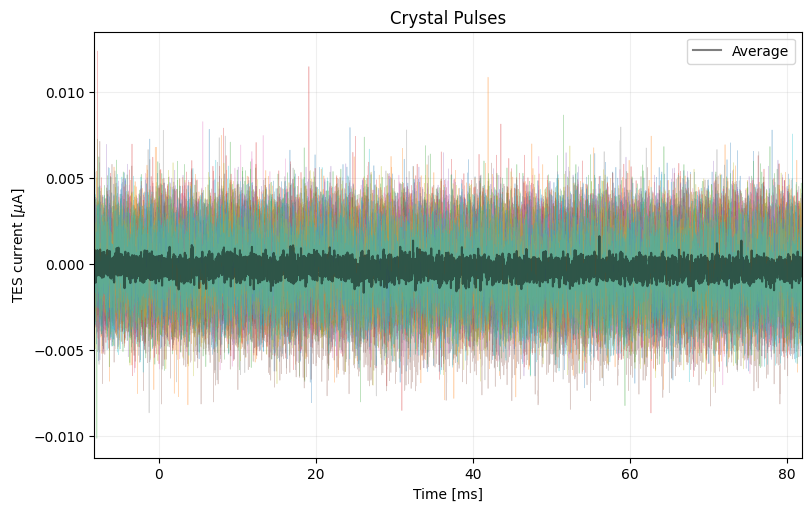

In [14]:
# Load some noise traces:
crystal_sample = RQ_helper.sample_from_mask(mask_noise,n_traces)
times, noise_traces = rq_helper.plot_traces(crystal_sample, "Crystal Pulses", nsmooth=1, plot_data=0.3, plot_mean=0.5)

100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


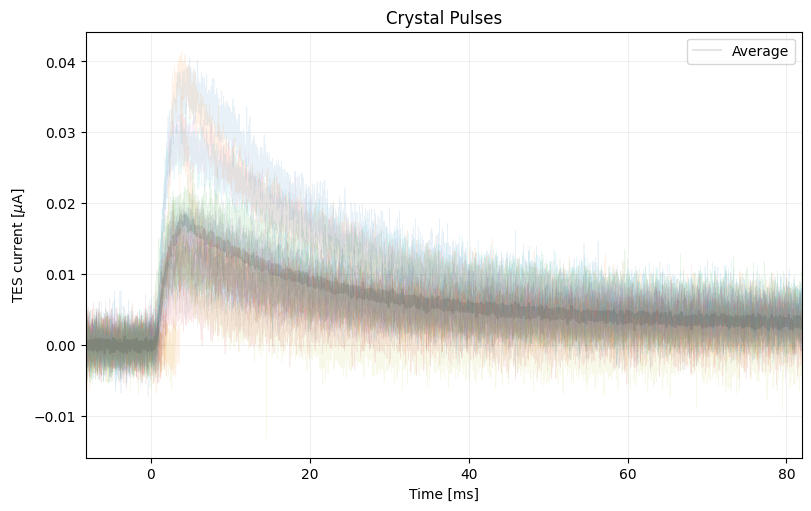

In [15]:
# Load some signal traces with very small amplitude:
crystal_sample = RQ_helper.sample_from_mask(mask_crystal & (RQ_data['OFL_CH1']>0.006),n_traces)
times, signal_traces = rq_helper.plot_traces(crystal_sample, "Crystal Pulses", nsmooth=1, plot_data=0.1, plot_mean=0.1)

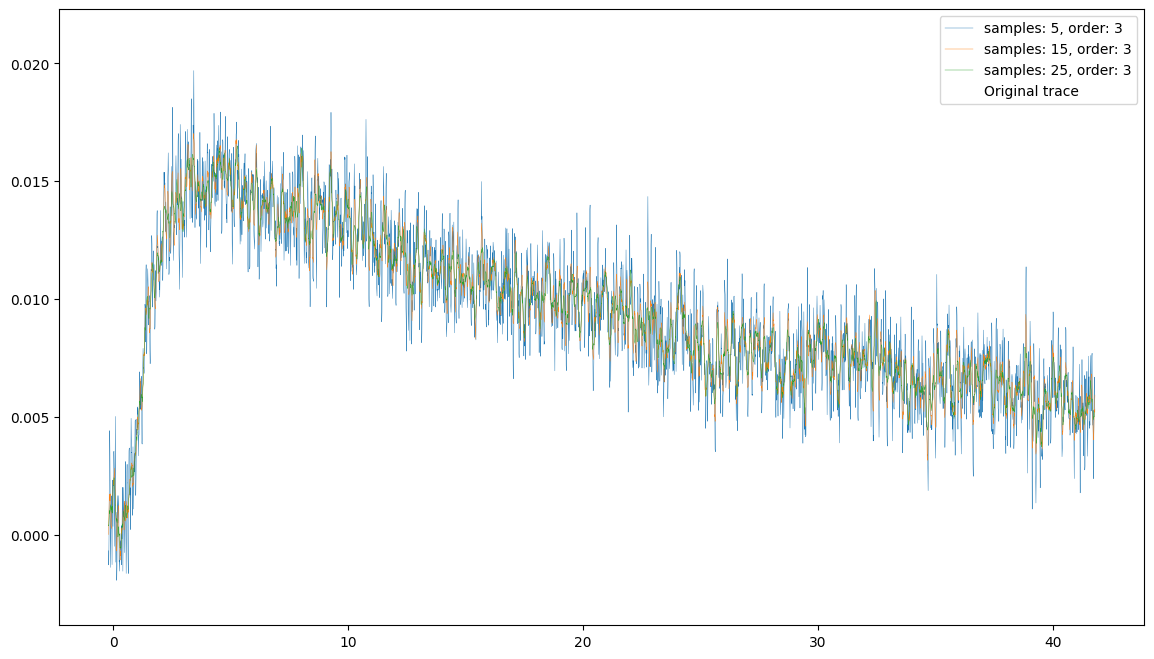

In [16]:
trace = signal_traces.T[0]
sl = np.s_[800:5000]

fig,ax = plt.subplots(figsize=(14,8))
for sg_nsample in savgol_nsample:
    for sg_order in savgol_order:
        filtered_trace = savgol_filter(trace, sg_nsample, sg_order)
        lab = "samples: {}, order: {}".format(sg_nsample,sg_order)
        ax.plot(times[sl], filtered_trace[sl],label=lab, alpha=1, lw=0.3)
        
ax.plot(times[sl], trace[sl], alpha = 0.0, label="Original trace")  
ax.legend()

# From playing around a little, SavGol can be quite large, like 15 is ok!

100%|██████████| 30/30 [00:03<00:00,  8.05it/s]


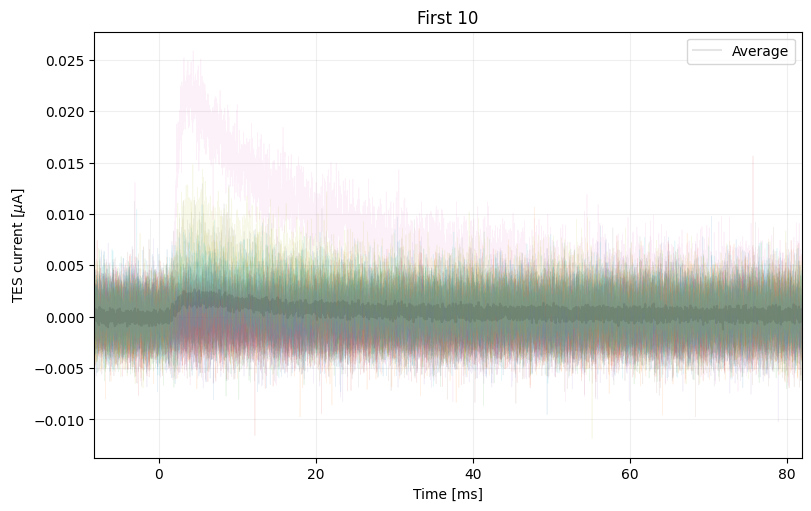

In [17]:
# Load the 10 first traces:
first_mask = np.zeros_like(mask_trigger)
first_mask[range(30)]=True
times, first_traces = rq_helper.plot_traces(first_mask, "First 10", nsmooth=1, plot_data=0.1, plot_mean=0.1)

100%|██████████| 10/10 [00:01<00:00,  5.96it/s]


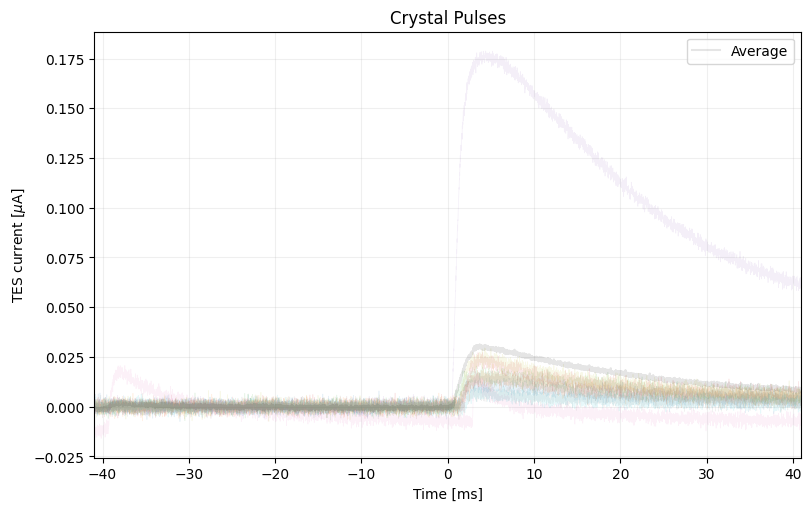

In [18]:
### Investigate Rise and Fall times: Cell I

# Load some config settings
pretrig = config.PRE_TRIG
posttrig = config.POST_TRIG
WindowForPulseRQs = config.WindowForPulseRQs

# Get 10 pulse traces
crystal_sample = RQ_helper.sample_from_mask(mask_crystal & (RQ_data['OFL_CH1']>0.006),10)
times, signal_traces = rq_helper.plot_traces(crystal_sample, "Crystal Pulses", nsmooth=1, plot_data=0.1, plot_mean=0.1, pre_trig=pretrig, post_trig=posttrig)


RiseTime1_ 2 0
RiseTime2_ 16 0
RiseTime3_ 6 0
FallTime1_ 77 -1
FallTime2_ 78 -1
FallTime3_ 9 -1
PulseWidth50_ 109 -1
PulseMaxInd_ 319 8


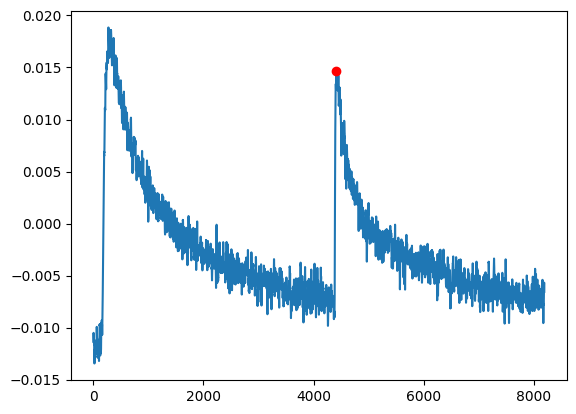

In [19]:
### Investigate Rise and Fall times: Cell II 
WindowForPulseRQs = 1000 # The culprit!

# Create a smoothened trace
n_trace = 6
tr_index = np.where(crystal_sample)[0][n_trace]
S = savgol_filter(signal_traces.T[n_trace], 15, 3)


# Copied from RQ calculations
tracemax_ind=np.argmax(S[pretrig:pretrig+WindowForPulseRQs])+pretrig
trace_max = np.max(S[pretrig:pretrig+WindowForPulseRQs])

fallingEdge30 = tracemax_ind + np.argmax(S[tracemax_ind:] < (trace_max*0.3)) # This is the falling edge when the pulse drops to 30% of max
fallingEdge50 = tracemax_ind + np.argmax(S[tracemax_ind:] < (trace_max*0.5)) # This is the falling edge when the pulse drops to 50% of max
fallingEdge90 = tracemax_ind + np.argmax(S[tracemax_ind:] < (trace_max*0.9)) # This is the falling edge when the pulse drops to 90% of max

risingEdge30 = tracemax_ind-np.argmax(S[:tracemax_ind][::-1] < (trace_max*0.3)) # This is the rising edge when the pulse drops to 30% of max
risingEdge50 = tracemax_ind-np.argmax(S[:tracemax_ind][::-1] < (trace_max*0.5)) # This is the rising edge when the pulse drops to 50% of max
risingEdge90 = tracemax_ind-np.argmax(S[:tracemax_ind][::-1] < (trace_max*0.9)) # This is the rising edge when the pulse drops to 90% of max

# Printing the results, matched to the PyCRP calculatons. Should be the same?
print("RiseTime1_", risingEdge50-risingEdge30, RQ_data["RiseTime1_CH1"][tr_index])
print("RiseTime2_", risingEdge90-risingEdge50, RQ_data["RiseTime2_CH1"][tr_index])
print("RiseTime3_", tracemax_ind-risingEdge90, RQ_data["RiseTime3_CH1"][tr_index])
print("FallTime1_", fallingEdge30-fallingEdge50, RQ_data["FallTime1_CH1"][tr_index])
print("FallTime2_", fallingEdge50-fallingEdge90, RQ_data["FallTime2_CH1"][tr_index])
print("FallTime3_", -tracemax_ind+fallingEdge90, RQ_data["FallTime3_CH1"][tr_index])
print("PulseWidth50_", (fallingEdge50-risingEdge50), RQ_data["PulseWidth50_CH1"][tr_index])
print("PulseMaxInd_", tracemax_ind-pretrig, RQ_data["PulseMaxInd_CH1"][tr_index])

plt.plot(S)
plt.plot(tracemax_ind, trace_max, marker='o', c='r')

(array([0.000e+00, 1.633e+03, 2.262e+03, 3.720e+03, 5.318e+03, 7.255e+03,
        7.697e+03, 7.246e+03, 5.707e+03, 4.230e+03, 2.935e+03, 2.051e+03,
        1.364e+03, 9.940e+02, 7.650e+02, 8.490e+02, 6.840e+02, 5.490e+02,
        4.110e+02, 3.300e+02, 2.630e+02, 1.790e+02, 1.840e+02, 1.550e+02,
        1.160e+02, 1.120e+02, 9.200e+01, 7.300e+01, 5.600e+01, 5.000e+01,
        5.100e+01, 4.500e+01, 3.500e+01, 2.400e+01, 1.600e+01, 1.800e+01,
        2.900e+01, 2.500e+01, 2.300e+01, 2.000e+01, 5.000e+00, 1.200e+01,
        1.300e+01, 1.200e+01, 6.000e+00, 6.000e+00, 6.000e+00, 8.000e+00,
        5.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 4.000e+00,
        2.000e+00, 5.000e+00, 5.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

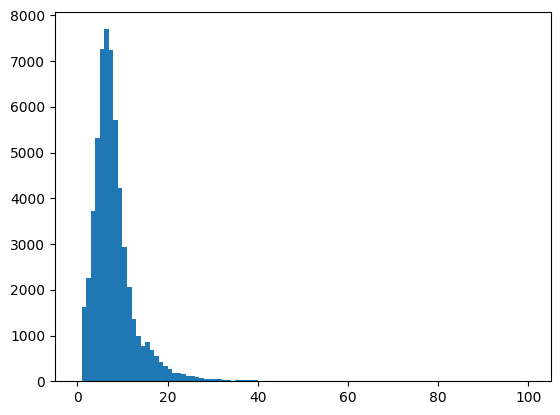

In [20]:
plt.hist(RQ_data["PulseWidth50_CH1"], bins=100, range = [0,100])

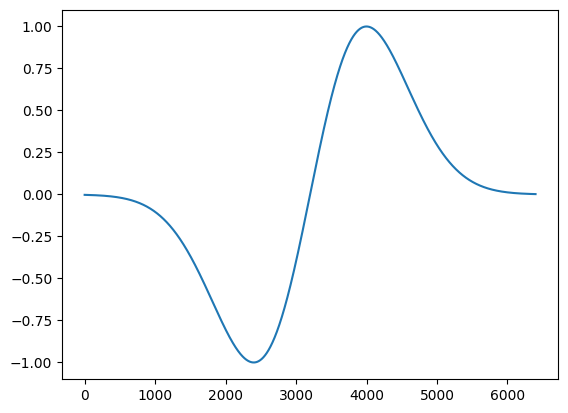

In [21]:
# plot the Gaussian kernel
plt.plot(RQ_data['trig_config']['CH1']['kernel'])

100%|██████████| 29/29 [00:43<00:00,  1.49s/it]


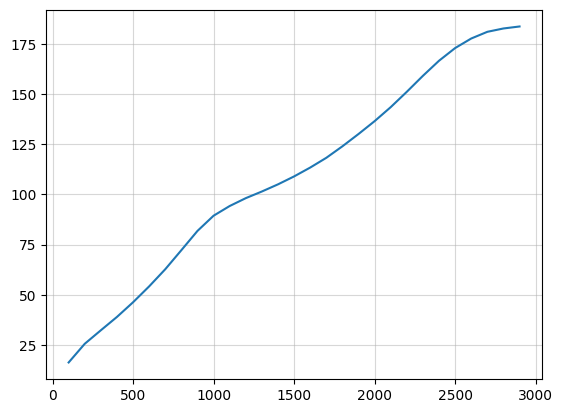

In [22]:
# Gaussian kernel testing
# Found that sigma 1000, order 1, truncate 4 works well
snrs = []
signal_triggers = []
noise_triggers = []

for sigma in tqdm(gauss_sigmas):
    signal = 0
    for signal_tr in signal_traces.T:
        filtered = gaussian_filter(signal_tr, sigma, order=gauss_order, mode='reflect', cval=0.0, truncate=gauss_truncate)
        trig_index = np.argmax(filtered)
        signal_triggers.append(trig_index)
        signal += filtered[trig_index]
        
    noise = 0
    for noise_tr in noise_traces.T:
        filtered = gaussian_filter(noise_tr, sigma, order=gauss_order, mode='reflect', cval=0.0, truncate=gauss_truncate)
        trig_index = np.argmax(filtered)
        noise_triggers.append(trig_index)
        noise += filtered[trig_index]
    snr = signal/noise
    snrs.append(snr)
        
plt.plot(gauss_sigmas,snrs)
plt.grid(alpha=0.5)

### Event viewer

100%|██████████| 57/57 [00:09<00:00,  6.33it/s]


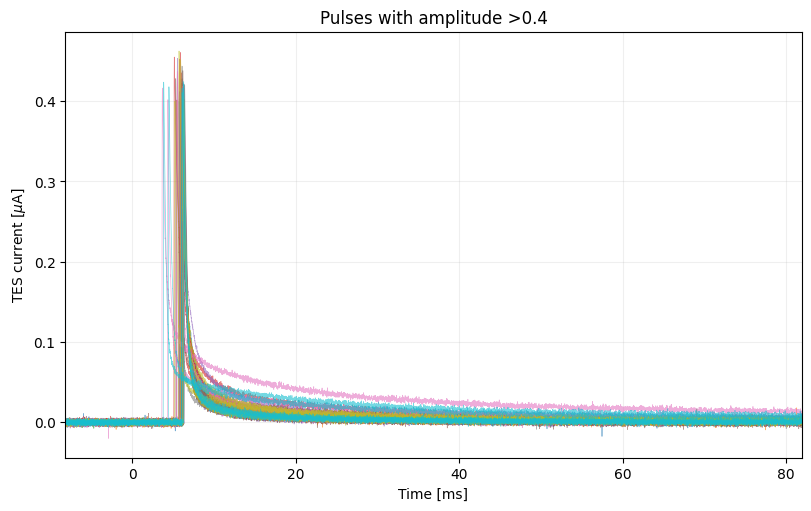

In [23]:
# Mask1:
mask_lab = "Pulses with amplitude >0.4"
mask_amp = (RQ_data['Amplitude_CH1']>0.4) & (RQ_data['trig_ch']==1)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, plot_data=0.6)

100%|██████████| 39/39 [00:06<00:00,  6.02it/s]


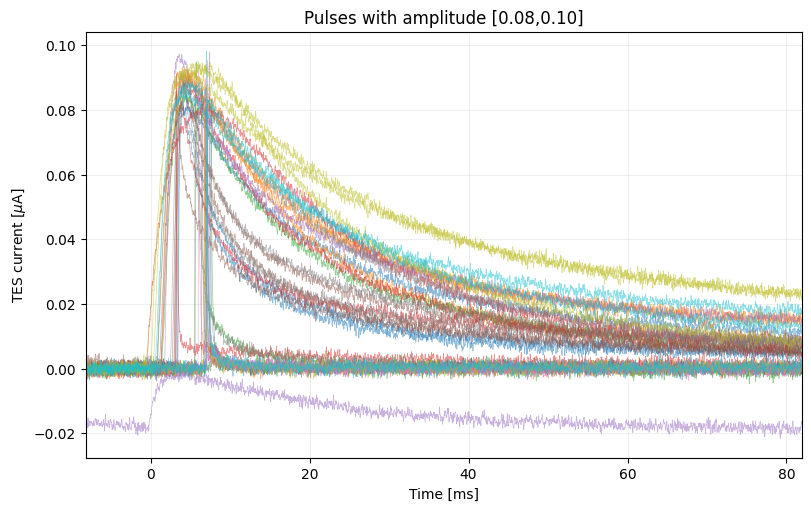

In [24]:
# Mask2:
mask_lab = "Pulses with amplitude [0.08,0.10]"
mask_amp = (RQ_data['Amplitude_CH1']<0.100) & (RQ_data['Amplitude_CH1']>0.08) & (RQ_data['trig_ch']==1)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, nsmooth=10, plot_data=0)

100%|██████████| 34/34 [00:05<00:00,  6.42it/s]


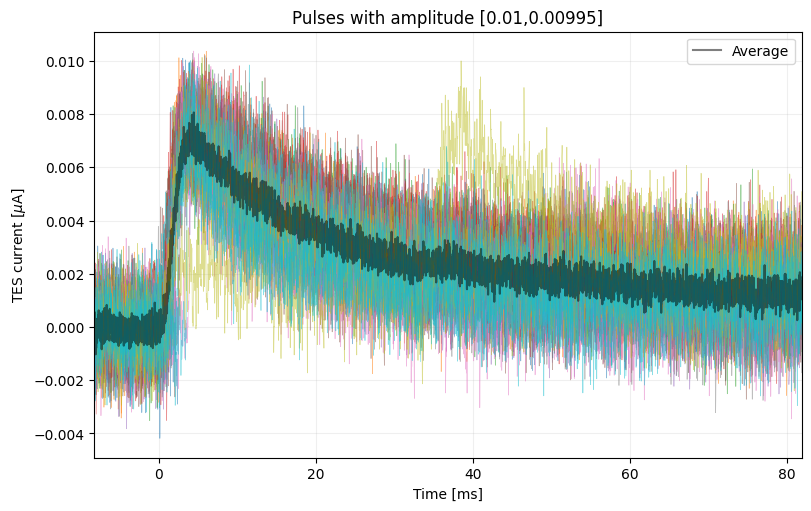

In [25]:
# Mask3:
mask_lab = "Pulses with amplitude [0.01,0.00995]"
mask_amp = (RQ_data['Amplitude_CH1']<0.01) & (RQ_data['Amplitude_CH1']>0.00995) & (RQ_data['trig_ch']==1)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, nsmooth=10, plot_data=0, plot_mean=0.5)

100%|██████████| 36/36 [00:05<00:00,  6.56it/s]


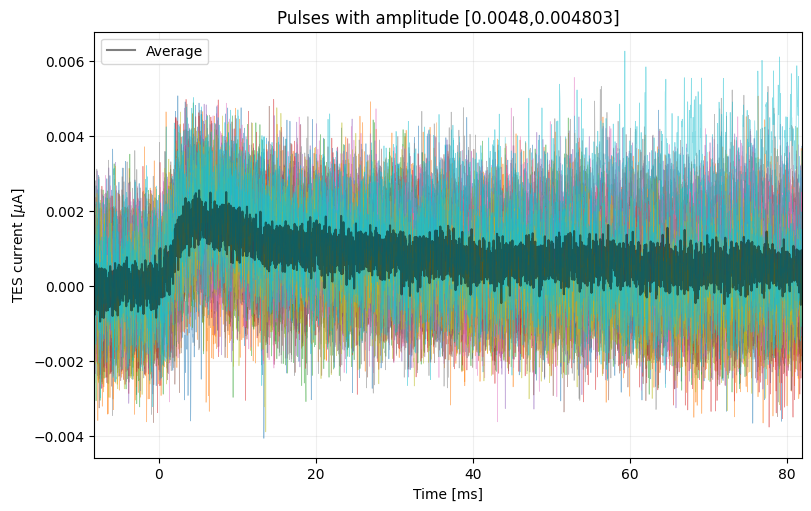

In [26]:
# Mask4:
mask_lab = "Pulses with amplitude [0.0048,0.004803]"
mask_amp = (RQ_data['Amplitude_CH1']<0.004803) & (RQ_data['Amplitude_CH1']>0.0048) & (RQ_data['trig_ch']==1)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, nsmooth=10, plot_data=0, plot_mean=0.5)

100%|██████████| 29/29 [00:04<00:00,  6.51it/s]


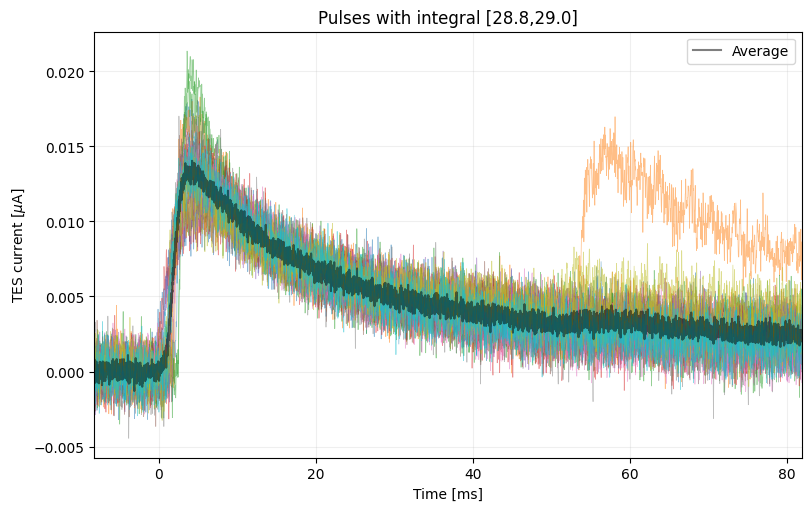

In [27]:
# Mask5:
mask_lab = "Pulses with integral [28.8,29.0]"
mask_amp = (RQ_data['Integral_CH1']<29) & (RQ_data['Integral_CH1']>28.8) & (RQ_data['trig_ch']==1)& (RQ_data['Amplitude_CH1']<0.2)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, nsmooth=10, plot_data=0, plot_mean=0.5)

Number of TES candidate pulses:  386


100%|██████████| 50/50 [00:07<00:00,  7.05it/s]


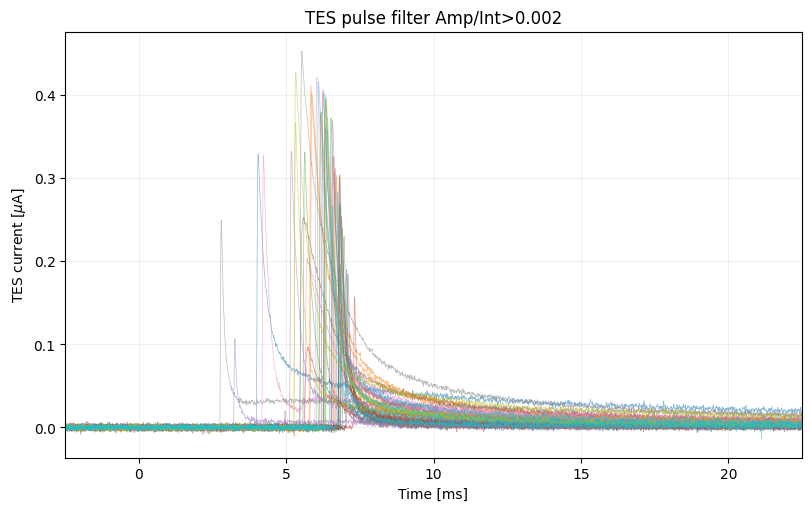

In [28]:
# Mask6: Select TES pulses
mask_lab = "TES pulse filter Amp/Int>0.002"
mask_amp = mask_trigger & (RQ_data['Amplitude_CH1']/RQ_data['Integral_CH1']>0.003) & (RQ_data['Amplitude_CH1']>0.02)
print("Number of TES candidate pulses: ", sum(mask_amp))
mask_amp = RQ_helper.sample_from_mask(mask_amp,50)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab,pre_trig=250,post_trig=2250)

In [29]:
# Mask7:
mask_lab = "Crystal pulse filter Amp/Int<0.002"
mask_amp = (RQ_data['Amplitude_CH1']/RQ_data['Integral_CH1']<0.002) & (RQ_data['trig_ch']==1) & (RQ_data['trig_traceidx']<4) & (RQ_data['trig_fileidx']==5)
times, traces = rq_helper.plot_traces(mask_amp, mask_lab, nsmooth=10, plot_data=0, plot_mean=0.5)

Maximum number of traces per plot exceeded: 140


### Make specific plots

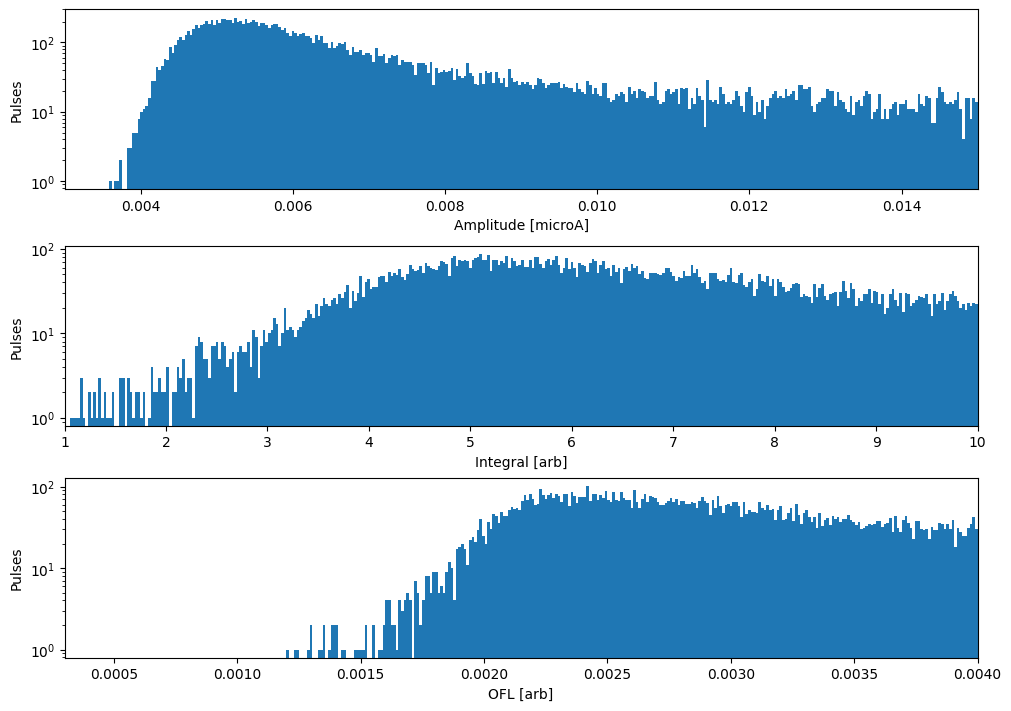

In [30]:
# Hunt for Fe55 in amplitude and integrals
data_amp = RQ_data['Amplitude_CH1'][mask_trigger]
data_int = RQ_data['Integral_CH1'][mask_trigger]
data_OFL = RQ_data['OFL_CH1'][mask_crystal]

fig, ax = plt.subplots(nrows=3,figsize=(10,7), constrained_layout=True)
ax[0].hist(data_amp, range=(0.003,0.015), bins=350)
ax[0].set_yscale('log')
ax[0].set_xlabel("Amplitude [microA]")
ax[0].set_ylabel("Pulses")
ax[0].set_xlim(0.003,0.015)

ax[1].hist(data_int, range=(1,10), bins=350)
ax[1].set_yscale('log')
ax[1].set_xlabel("Integral [arb]")
ax[1].set_ylabel("Pulses")
ax[1].set_xlim(1,10)

ax[2].hist(data_OFL, range=(0.0003,0.004), bins=350)
ax[2].set_yscale('log')
ax[2].set_xlabel("OFL [arb]")
ax[2].set_ylabel("Pulses")
ax[2].set_xlim(0.0003,0.004)

fig.savefig("Amplitude_Integral_1D.pdf")